# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Putra Pamungkas Akbar Wibowo
- **Email:** akbarwibowo0123@gmail.com
- **ID Dicoding:** akbarwibowo03

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: **Jam** berapa pelanggan paling sering **berbelanja**?
- Pertanyaan 2: **Wilayah** mana yang memiliki **peningkatan persentase** basis pelanggan tertinggi dalam **6 bulan terakhir**?
- Pertanyaan 3: **Jenis** barang apa yang memiliki **penjualan tertinggi** dalam **1 kuartal terakhir**?
- Pertanyaan 4: Metode **pembayaran** mana yang paling **populer** berdasarkan jumlah **total pembayaran**?
- Pertanyaan 5: **Jenis** barang apa saja yang mengalami **kenaikan persentase penjualan terbanyak** dibandingkan dengan **tahun sebelumnya**?
- Pertanyaan 6: Berapa **rata-rata total harga per transaksi** per **bulan**?
- Pertanyaan 7: Apakah terdapat **korelasi** antara jumlah **foto produk** dengan **jumlah penjualan** produk?

## Import Semua Packages/Library yang Digunakan

In [151]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

tidak menghiraukan **warning** supaya output lebih mudah dibaca

## Data Wrangling

### Gathering Data

#### 1. Customers Dataset

In [4]:
customers_dataset = pd.read_csv('E-Commerce Public Dataset/customers_dataset.csv')
customers_dataset.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

#### 2. Geolocation dataset

In [5]:
geolocation_dataset = pd.read_csv('E-Commerce Public Dataset/geolocation_dataset.csv')
geolocation_dataset.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

#### 3. Order Items Dataset

In [6]:
order_items_dataset = pd.read_csv('E-Commerce Public Dataset/order_items_dataset.csv')
order_items_dataset.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

#### 4. Order Reviews Dataset

In [7]:
order_reviews_dataset = pd.read_csv('E-Commerce Public Dataset/order_reviews_dataset.csv')
order_reviews_dataset.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

#### 5. Orders Dataset

In [8]:
orders_dataset = pd.read_csv('E-Commerce Public Dataset/orders_dataset.csv')
orders_dataset.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

#### 6. Product Category Name Translation

In [9]:
product_category_name_translation = pd.read_csv('E-Commerce Public Dataset/product_category_name_translation.csv')
product_category_name_translation.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

#### 7. Products Dataset


In [10]:
products_dataset = pd.read_csv('E-Commerce Public Dataset/products_dataset.csv')
products_dataset.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

#### 8. Sellers Dataset

In [11]:
sellers_dataset = pd.read_csv('E-Commerce Public Dataset/sellers_dataset.csv')
sellers_dataset.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

#### 9. Order Payments Dataset

In [12]:
order_payments_dataset = pd.read_csv('E-Commerce Public Dataset/order_payments_dataset.csv')
order_payments_dataset.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

**Insight:**
- terdapat **8** dataset yang dapat digunakan untuk analisis data
- terdapat data garis bujur dan garis lintang di `geolocation_dataset` pada setiap kodepos yang sesuai dengan kodepos yang terdapat di `customers_dataset`
- terdapat jangka waktu dari suatu barang di pesan sampai dikirimkan ke customer di `orders_dataset`
- terdapat data mengenai review dari setiap order yang dilakukan di `order_reviews_dataset`
- terdapat data mengenai harga dalam setiap pesanan di `order_items_dataset`
- terdapat data mengenai jenis pembayaran yang digunakan oleh customer di `order_payments_dataset`

### Assessing Data

#### 1. Customers Dataset

In [13]:
customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [14]:
customers_dataset.sample(5)

customer_id                customer_unique_id  \
98788  54a3a6f6333268fbb453f6b9834e90b1  74f8bf53fadec7ea8e08cf119d0fa4da   
17723  b5d5a9c1b46698fde8e82171124dcf4a  1b5720c7b0ee7183c2eafe3dba65111b   
87965  5dce0d6d2ad974afb75df4b6ae8e4ac8  b5759e69e3c3eb05bb72884780c7f579   
97333  e81e34aceb609cbe25cd97313f7c35b6  f1ca76c15cc02929d6247083a882ecd3   
63905  650adb1f88debf292e06b74891d32e22  ce7c016da2db9c0a9393435b421532c1   

       customer_zip_code_prefix   customer_city customer_state  
98788                     26900  miguel pereira             RJ  
17723                      9190     santo andre             SP  
87965                      4530       sao paulo             SP  
97333                     23070  rio de janeiro             RJ  
63905                     40414        salvador             BA

In [15]:
print(f'Null values: {customers_dataset.isnull().sum()}')
print(f'\nDuplicated values: {customers_dataset.duplicated().sum()}')

Null values: customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Duplicated values: 0


**Insight:**
- terdapat `99441` baris dalam `customers_dataset`
- setiap kolom sudah terdeskripsi sesuai dengan data di dalamnya
- setiap kolom sudah memiliki jenis data yang sesuai dengan data di dalamnya
- tidak terdapat data kosong ataupun data duplikat dalam dataset

#### 2. Geolocation Dataset

In [16]:
geolocation_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [17]:
geolocation_dataset.sample(5)

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
86205                          4363       -23.641973       -46.660851   
902515                        88025       -27.578354       -48.540190   
699097                        47600       -13.254618       -43.416435   
333831                        14270       -21.475996       -47.362221   
835293                        79013       -20.417094       -54.594978   

             geolocation_city geolocation_state  
86205               são paulo                SP  
902515          florianopolis                SC  
699097      bom jesus da lapa                BA  
333831  santa rosa de viterbo                SP  
835293           campo grande                MS

In [18]:
print(f'Null values: {geolocation_dataset.isnull().sum()}')
print(f'\nDuplicated values: {geolocation_dataset.duplicated().sum()}')

Null values: geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Duplicated values: 261831


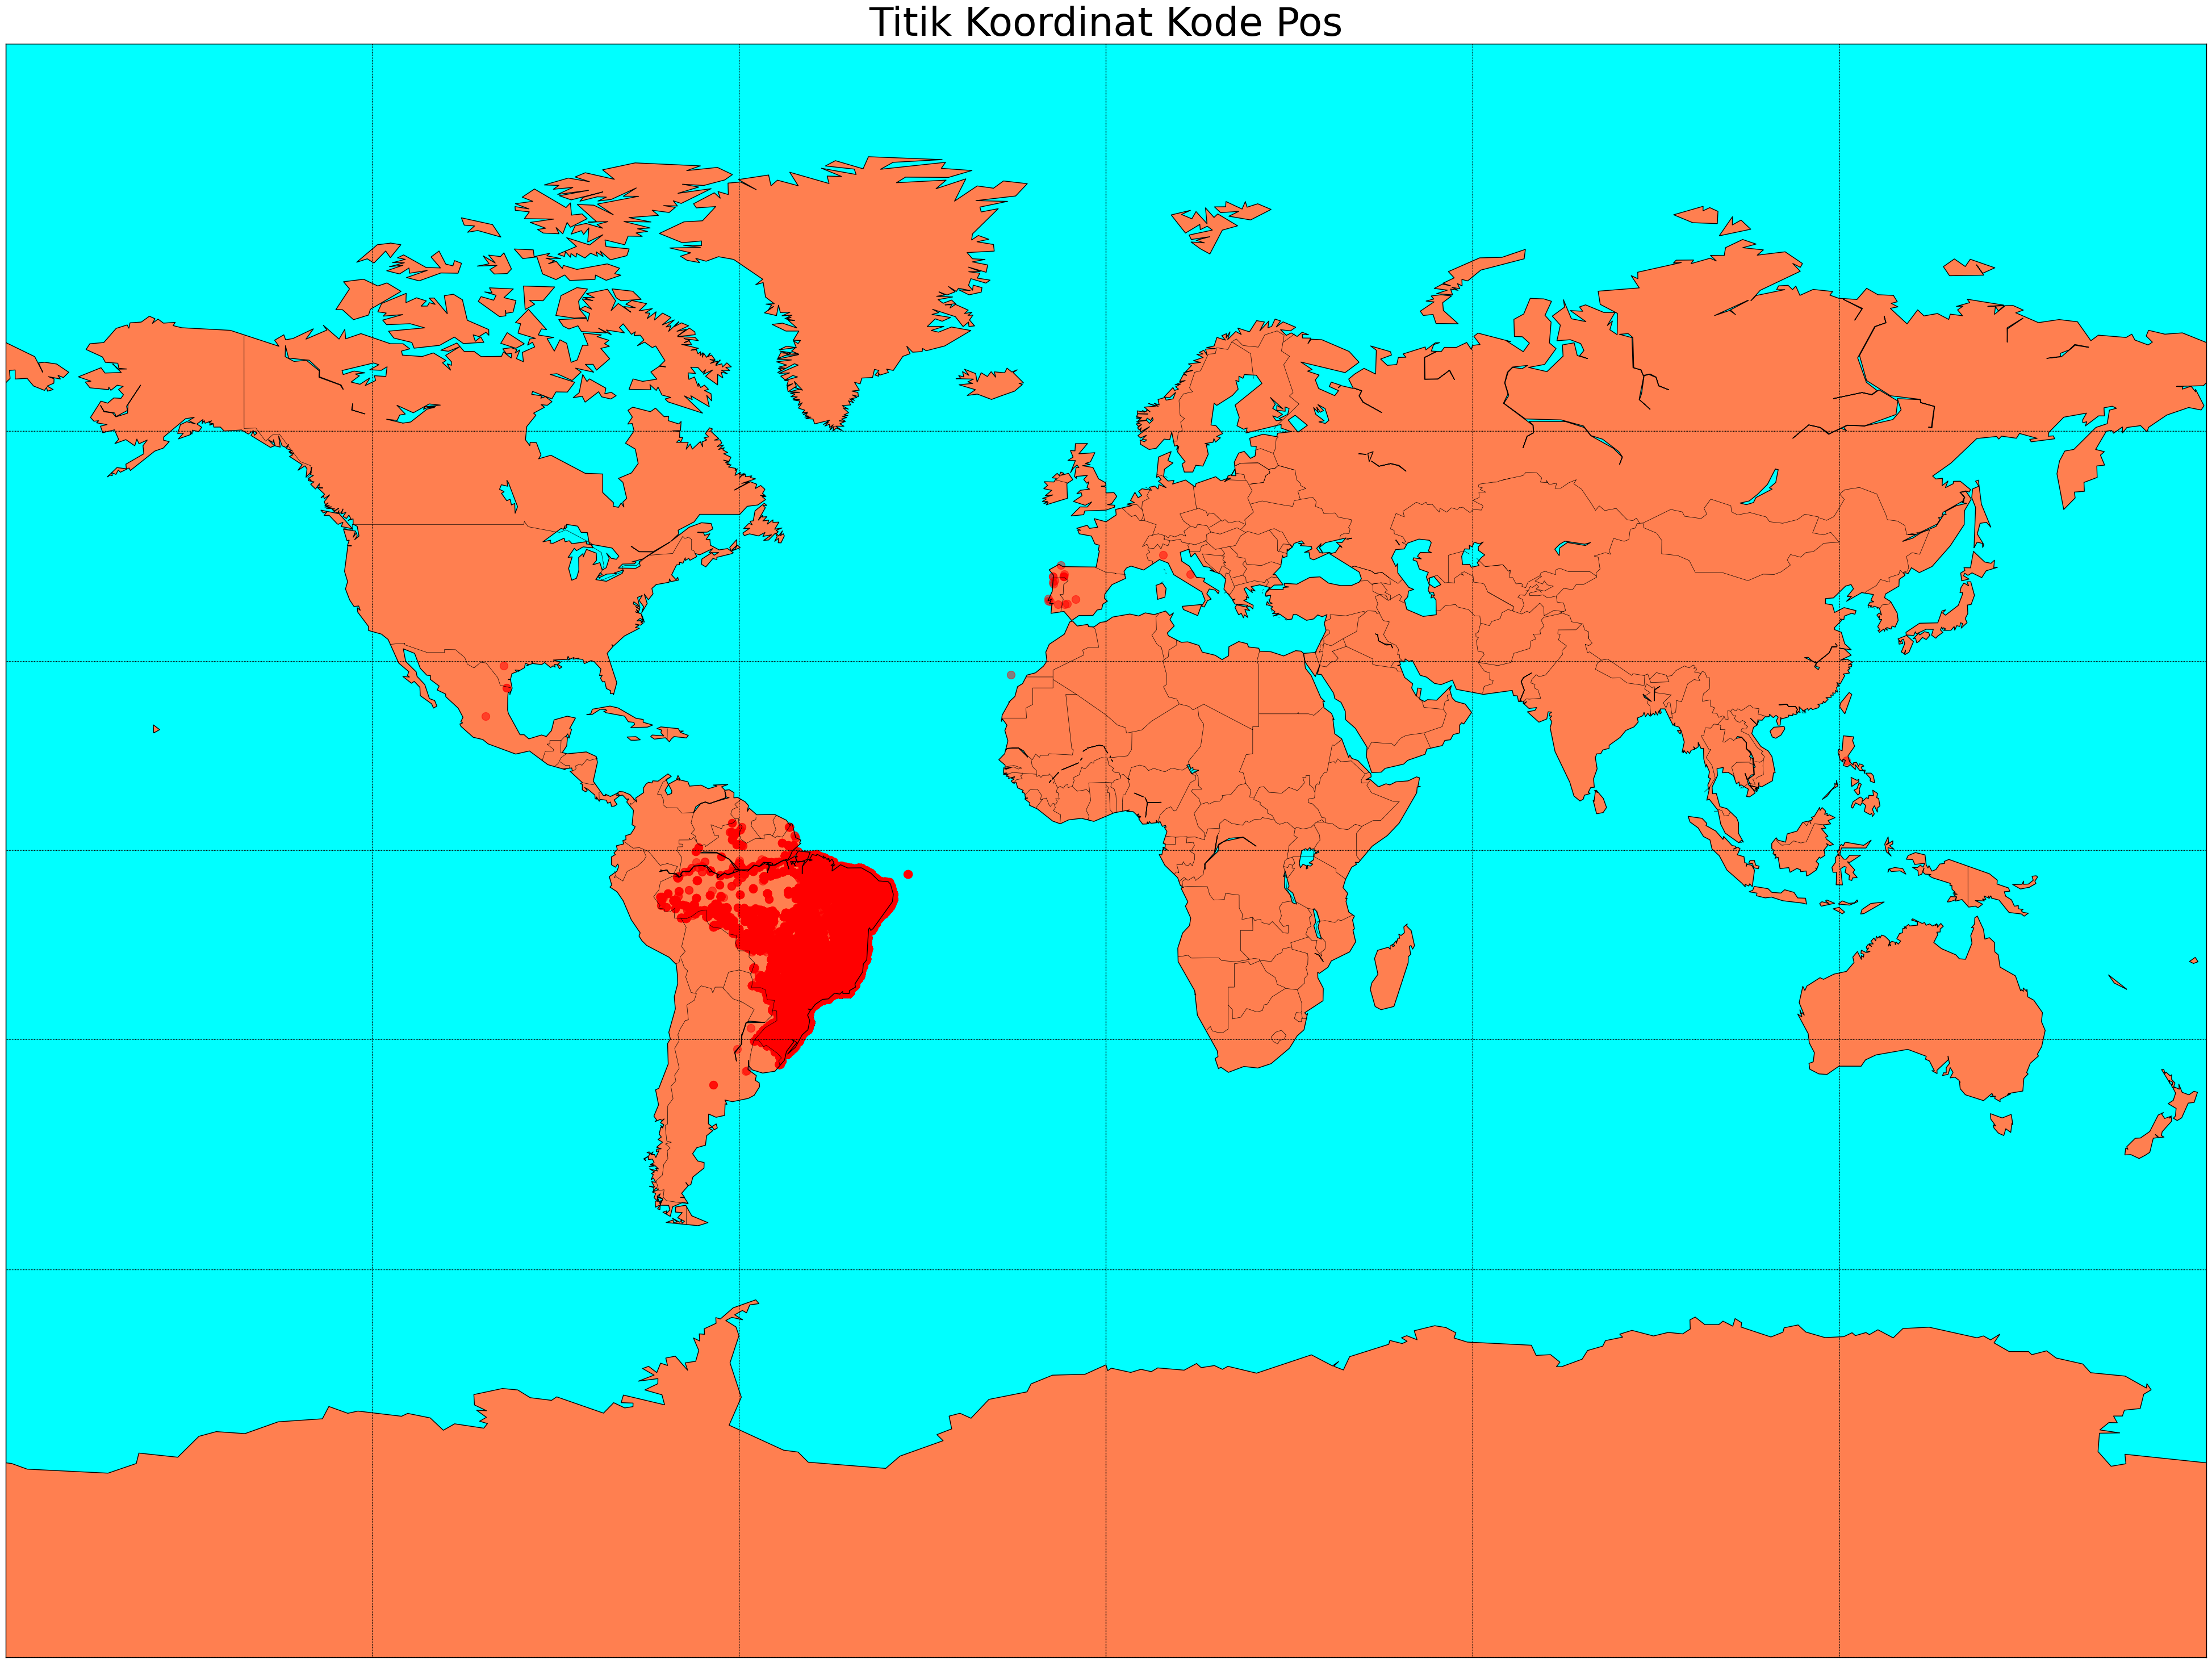

In [19]:
def plot_map(dataset, lat_col_name, long_col_name, title):
    latitude = dataset[lat_col_name].tolist()
    longitude = dataset[long_col_name].tolist()
    # membuat basemap peta dunia
    plt.figure(figsize=(50, 50))
    m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
                llcrnrlon=-180,urcrnrlon=180,resolution='c')
    m.drawcoastlines()
    m.fillcontinents(color='coral',lake_color='aqua')
    # draw parallels and meridians.
    m.drawparallels(np.arange(-90.,91.,30.))
    m.drawmeridians(np.arange(-180.,181.,60.))
    m.drawmapboundary(fill_color='aqua') 
    m.drawcountries(color='black')

    # menambahkan titik koordinat
    m.scatter(longitude, latitude, latlon=True, s=100, c='red', marker='o', alpha=0.5)

    plt.title(title, fontsize=50)
    plt.show()

plot_map(geolocation_dataset, 'geolocation_lat', 'geolocation_lng', 'Titik Koordinat Kode Pos')

**Insight:**
- terdapat `1000163` baris dalam `geolocation_dataset`
- nama kolom sudah mendeskripsikan data yang terdapat di dalamnya
- jenis data setiap kolom sudah sesuai dengan data yang ada di dalamnya
- tidak terdapat data kosong dalam dataset
- terdapat `261831` data duplikat
- titik koordinat di data sudah sesuai dan terlihat di peta dunia
- terdapat beberapa titik koordinat yang terletak jauh dari mayoritas titik koordinat yang lain


#### 3. Order Items Dataset

In [20]:
order_items_dataset.info()
order_items_dataset.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


order_id  order_item_id  \
73079  a69861ade02dc3d5fe3dfbd36763519c              1   
43055  61fba313862d5071658794c520745397              1   
25259  397c0e626cd53023d629b5053d222ce4              1   
75426  abbfeb15e92b49fc3961aab15d3d25f9              1   
32677  4a0ecd7c37432ea5916a1f36f7c402de              1   

                             product_id                         seller_id  \
73079  53759a2ecddad2bb87a079a1f1519f73  1f50f920176fa81dab994f9023523100   
43055  ad7c531c2001111873dcfed9d8317439  7a67c85e85bb2ce8582c35f2203ad736   
25259  dd231637766e756fd1cf2fd80501fce1  101a3a003516bc11253298b2fad3cb65   
75426  b816ff414e308c71a09f04b4d0845c44  fa1a9dec3a9940c072684a46728bf1fc   
32677  05237facc08e138d9cec4742f145cc00  32f1bb9dfa65bc7df5c0d9d95a616be4   

       shipping_limit_date  price  freight_value  
73079  2018-05-21 04:30:45  53.90          13.09  
43055  2017-10-26 03:07:29  59.99          29.95  
25259  2018-07-05 10:55:14  40.00          19.47  
75426  2017-12-13 03:14:48  99.90          17.95  
32677  2018-03-23 00:50:21  66.89           7.39

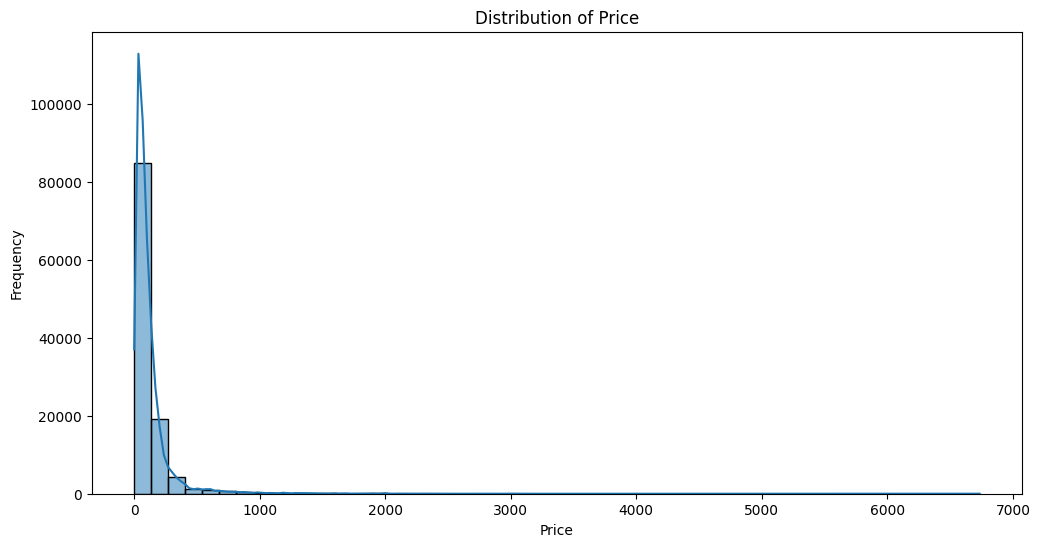

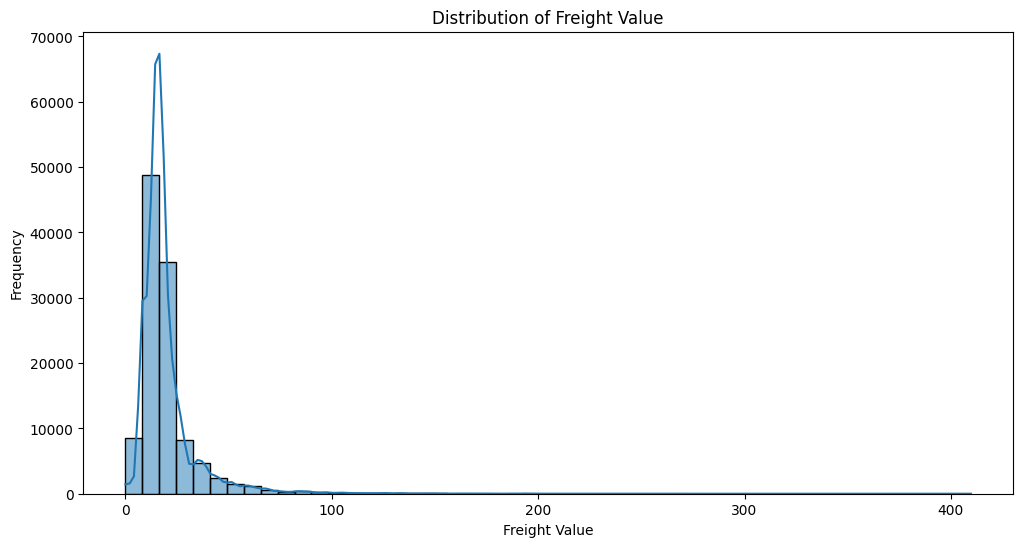

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(order_items_dataset['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(order_items_dataset['freight_value'], bins=50, kde=True)
plt.title('Distribution of Freight Value')
plt.xlabel('Freight Value')
plt.ylabel('Frequency')
plt.show()

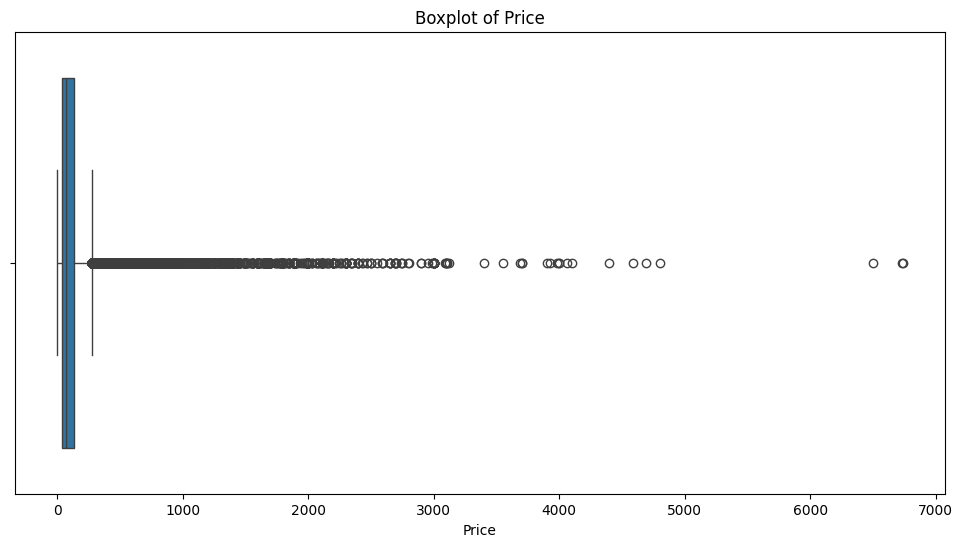

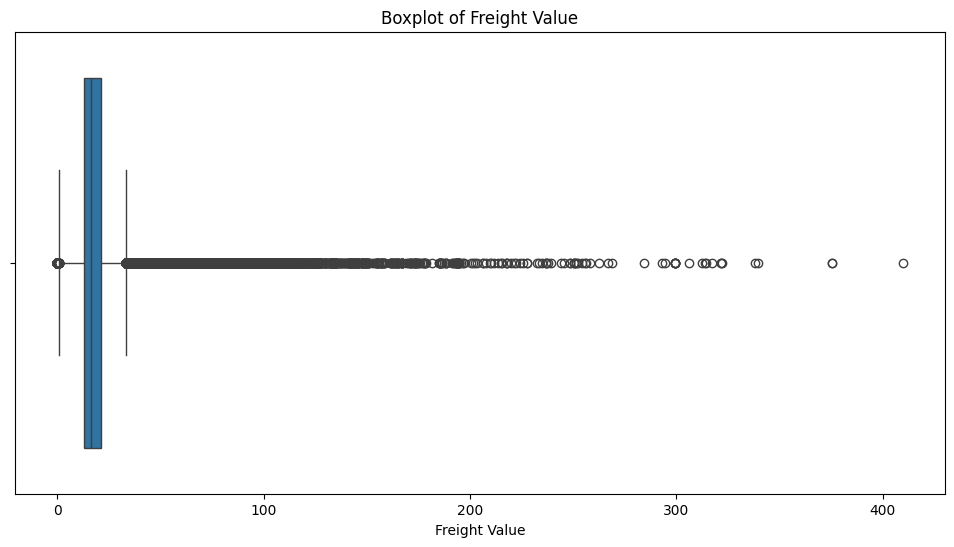

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=order_items_dataset['price'])
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=order_items_dataset['freight_value'])
plt.title('Boxplot of Freight Value')
plt.xlabel('Freight Value')
plt.show()

In [23]:
order_items_dataset.describe()

order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000

In [24]:
print(f'Null values: {order_items_dataset.isnull().sum()}')
print(f'\nDuplicated values: {order_items_dataset.duplicated().sum()}')

Null values: order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Duplicated values: 0


**Insight**
- terdapat `112650` baris data dalam `order_items_dataset`
- nama kolom sudah mendeskripsikan jenis data di dalamnya
- terdapat kesalahan jenis data pada kolom `shipping_limit_date` dimana jenis data pada kolom tersebut adalah object dan bisa dirubah ke date
- data pada kolom `price` dan `freight_value` memiliki jenis distribusi *right_skewed*
- data tidak berdistribusi normal, tetapi dikarenakan akan dilakukan EDA untuk mendapatkan insight dari data, maka data tidak akan di normalisasi dan tetap menjaga value data asli
- data pada `price` memiliki rata-rata sebesar `120.63` dan median `74.99`
- data pada `freight_value` mewmiliki rata-rata sebesar `19.99` dan median `16.26`
- tidak terdapat data kosong ataupun data duplikat

#### 4. Order Reviews Dataset

In [25]:
order_reviews_dataset.info()
order_reviews_dataset.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


review_id                          order_id  \
39937  fb0dc0ec2d312b398a85cdf08dafed37  65dcb85abbb41e3ece2afabaacad1d2d   
97790  b52e83ec184ac5b005c8a2cbd23ba46a  774c56b5c1305e0dc2a79ad46e118ba4   
50635  dcebfef07ae5bad804471747a19338e0  779faf56113de193cb40644b3c455c44   
89671  308fb813a1409451b334c691329a1b42  7b994fc7c7528d2098eebcb19d18ce7e   
11863  01373684a9da483ea9e320495c4d72b0  d8efabfe9ad61f46b19449da5215e3f6   

       review_score review_comment_title  \
39937             1                  NaN   
97790             4            Muito bom   
50635             5                  NaN   
89671             1                  NaN   
11863             4                  NaN   

                                  review_comment_message review_creation_date  \
39937  Chegou aqui ao invés do reparador de pneus, um...  2018-03-27 00:00:00   
97790                                                NaN  2018-07-15 00:00:00   
50635  Estão de parabéns pela pontualidade e qualidad...  2018-04-14 00:00:00   
89671                                                NaN  2017-09-27 00:00:00   
11863                                                NaN  2018-07-14 00:00:00   

      review_answer_timestamp  
39937     2018-03-28 22:53:13  
97790     2018-07-15 21:51:03  
50635     2018-04-25 20:19:42  
89671     2017-09-27 20:11:54  
11863     2018-07-14 22:55:29

In [26]:
print(f'Null values: {order_reviews_dataset.isnull().sum()}')
print(f'\nDuplicated values: {order_reviews_dataset.duplicated().sum()}')

Null values: review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Duplicated values: 0


**Insight**
- terdapat `99224` baris dalam `order_reviews_dataset`
- nama kolom sudah mendeskripsikan data di dalamnya
- terdapat kesalahan jenis data pada `review_creation_date` dan `review_answer_timestamp` yang berjenis object dapat dirubah ke jenis datetime
- terdapat data kosong pada kolom `review_comment_title` dan `review_comment_message`
- tidak terdapat data duplikat

#### 5. Orders Dataset

In [27]:
orders_dataset.info()
orders_dataset.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


order_id                       customer_id  \
65407  abb9f3409081aa15446fa8ae9add98db  8a2b7d85cd74e69ac62108df819c154f   
89366  21f3d0f22004d8bad479ca281e1f00a2  10a28db6b47db45e43477c3ceaa1046a   
7301   e912fe377f77944ec68b3650ead100bf  159f7183e121d412169e30a10a7a4c63   
95305  b89851145dc1888ce963c2e7da8ce7be  1066a008ffb5653bfba6da4bb5843358   
10933  a46dac4a7a15e660ad481ebac20f3d3b  2a55b31985ca766806f4be2033977429   

      order_status order_purchase_timestamp    order_approved_at  \
65407    delivered      2018-05-12 18:53:09  2018-05-13 18:53:52   
89366    delivered      2018-03-08 16:00:52  2018-03-08 16:31:40   
7301     delivered      2017-03-07 22:46:32  2017-03-09 02:55:17   
95305      shipped      2017-11-24 23:02:40  2017-11-25 02:13:02   
10933    delivered      2018-04-09 18:14:34  2018-04-13 12:34:24   

      order_delivered_carrier_date order_delivered_customer_date  \
65407          2018-05-15 12:10:00           2018-05-22 00:40:50   
89366          2018-03-09 22:46:44           2018-03-20 15:18:53   
7301           2017-03-13 09:31:18           2017-03-17 14:14:10   
95305          2017-11-27 20:46:49                           NaN   
10933          2018-04-13 22:21:22           2018-04-19 19:24:52   

      order_estimated_delivery_date  
65407           2018-06-06 00:00:00  
89366           2018-03-29 00:00:00  
7301            2017-04-04 00:00:00  
95305           2017-12-15 00:00:00  
10933           2018-04-26 00:00:00

In [28]:
orders_dataset['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [29]:
print(f'Null values: {orders_dataset.isnull().sum()}')
print(f'\nDuplicated values: {orders_dataset.duplicated().sum()}')

Null values: order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Duplicated values: 0


**Insight**
- terdapat `99441` baris data dalam `orders_dataset`
- nama kolom sudah mendeskripsikan data di dalamnya
- terdapat kesalahan jenis data pada kolom yang berisi data tanggal yang berjenis object dan dapat dirubah ke datetime dan kolom `order_status` yang dapat dirubah kedalam bentuk categorical
- terdapat data kosong pada kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date`
- tidak terdapat data duplikat

#### 6. Product Category Name Translation

In [30]:
product_category_name_translation.info()
product_category_name_translation.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


product_category_name product_category_name_english
46                   artes                           art
56      eletrodomesticos_2             home_appliances_2
40         casa_construcao             home_construction
1   informatica_acessorios         computers_accessories
8                telefonia                     telephony

In [31]:
print(f'Null values: {product_category_name_translation.isnull().sum()}')
print(f'\nDuplicated values: {product_category_name_translation.duplicated().sum()}')

Null values: product_category_name            0
product_category_name_english    0
dtype: int64

Duplicated values: 0


**Insight**
- terdapat `71` baris data dalam `product_category_name_translation` dataset
- nama kolom sudah mendeskripsikan data di dalamnya
- jenis data dari semua kolom sudah sesuai
- tidak terdapat data kosong ataupun data duplikat

#### 7. Products Dataset

In [32]:
products_dataset.info()
products_dataset.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


product_id   product_category_name  \
27768  0e89c3d718b2577cd55974355651d15b        moveis_decoracao   
1515   74abe2be0a975b4af328f6e69f8a5ea1          consoles_games   
9008   c86f95986c7050bf988aed62520093e7            beleza_saude   
27134  1f32fa4223c913c075458059fde383bb  informatica_acessorios   
4774   53da2e917302c9e5e834b9968ea829a7              automotivo   

       product_name_lenght  product_description_lenght  product_photos_qty  \
27768                 57.0                       281.0                 2.0   
1515                  27.0                       205.0                 3.0   
9008                  57.0                      1550.0                 1.0   
27134                 46.0                       207.0                 2.0   
4774                  57.0                       868.0                 3.0   

       product_weight_g  product_length_cm  product_height_cm  \
27768             850.0               30.0                5.0   
1515              550.0               34.0                7.0   
9008             3700.0               22.0               22.0   
27134             950.0               36.0               15.0   
4774              500.0               24.0                6.0   

       product_width_cm  
27768              45.0  
1515               19.0  
9008               22.0  
27134              23.0  
4774               26.0

In [33]:
products_dataset.describe()

product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32949.000000  
mean          23.196728  
std           12.079047  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

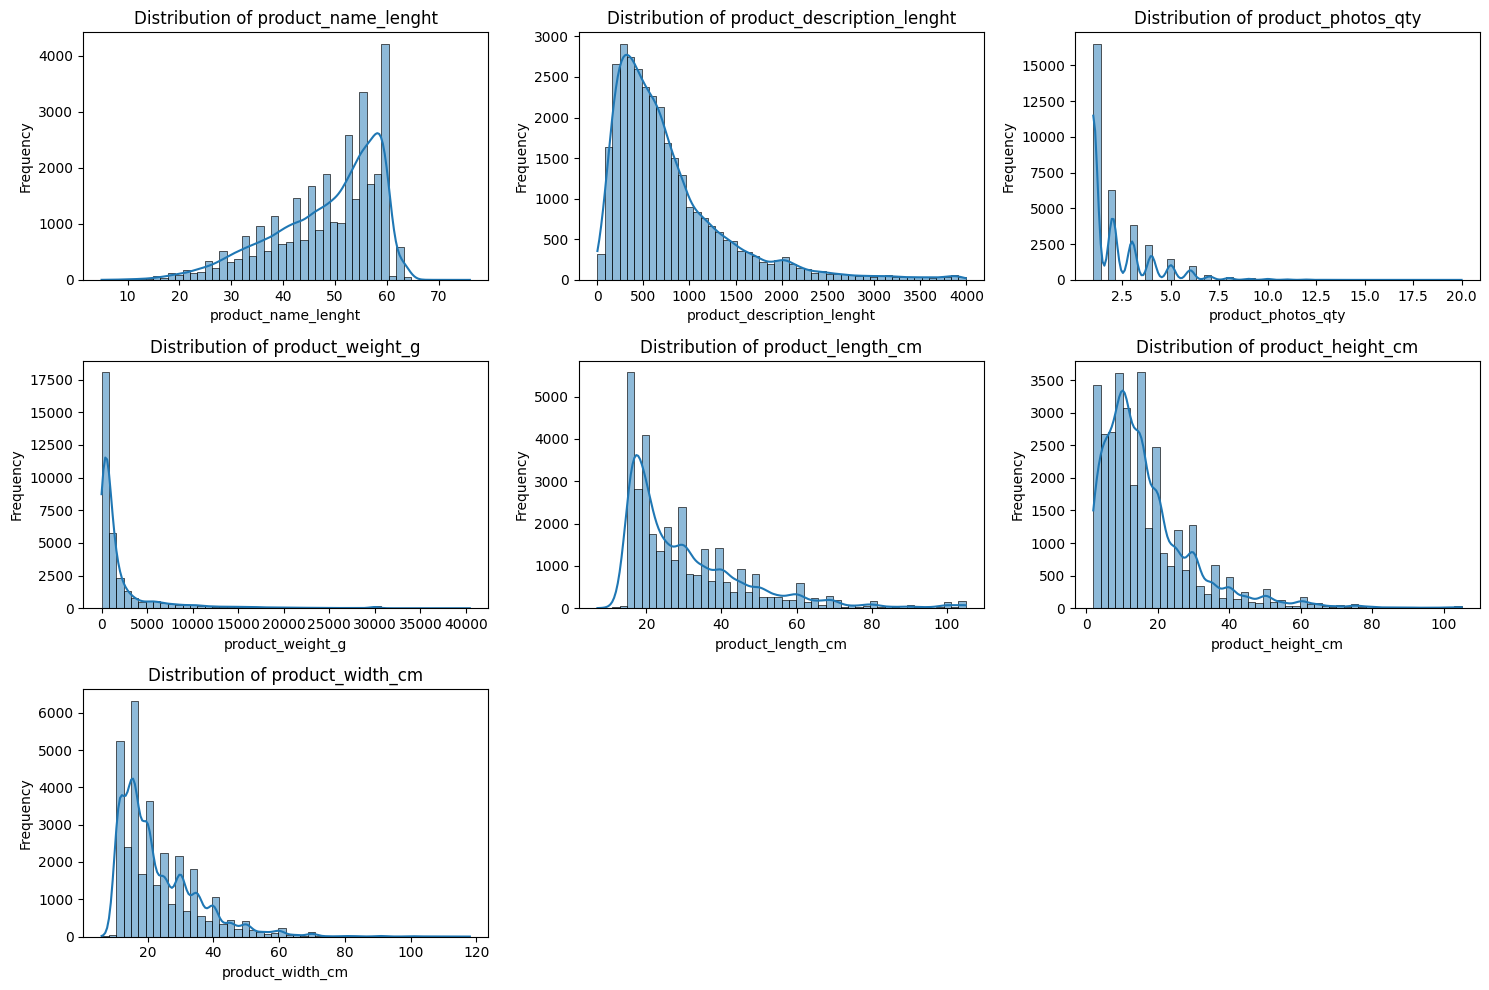

In [34]:
float_columns = products_dataset.select_dtypes(include=['float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(float_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(products_dataset[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [35]:
print(f'Null values: {products_dataset.isnull().sum()}')
print(f'\nDuplicated values: {products_dataset.duplicated().sum()}')

Null values: product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Duplicated values: 0


**Insight**
- terdapat `32951` baris data dalam `products_dataset`
- semua data numerikal tidak ada yang memiliki distribusi data normal, tetapi untuk menjaga keaslian value data untuk dilakukan EDA, data akan tetap dibiarkan seperti itu
- jenis data pada semua kolom sudah sesuai
- terdapat kesalahan penulisan pada nama kolom yang berakhiran `lenght` dimana yang benar adalah `length`
- nama kolom sudah mendeskripsikan data di dalamnya
- terdapat data kosong pada kolom `product_category_name`, `product_name_lenght`, `product_description_lenght`, dan `product_photos_qty`
- tidak terdapat data duplikat


#### 8. Sellers Dataset

In [36]:
sellers_dataset.info()
sellers_dataset.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


seller_id  seller_zip_code_prefix  \
2384  325f3178fb58e2a9778334621eecdbf9                    6790   
1041  612170e34b97004b3ba37eae81836b4c                   93542   
647   f62d7bb4a613ec758a03342d46b580b2                   36570   
2606  3a79f35a2344ede41af21267f61d5ec6                   13040   
1219  9dda5bbacd45e18d6485fee649205d09                   37540   

                seller_city seller_state  
2384        taboao da serra           SP  
1041          novo hamburgo           RS  
647                  vicosa           MG  
2606               campinas           SP  
1219  santa rita do sapucai           MG

In [37]:
print(f'Null values: {sellers_dataset.isnull().sum()}')
print(f'\nDuplicated values: {sellers_dataset.duplicated().sum()}')

Null values: seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Duplicated values: 0


**Insight**
- terdapat `3095` baris data dalam `sellers_dataset`
- nama kolom sudah mendeskripsikan data di dalamnya
- jenis data pada setiap kolom sudah sesuai
- tidak ada data kosong ataupun data duplikat

#### 9. Order Payments Dataset

In [38]:
order_payments_dataset.info()
order_payments_dataset.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


order_id  payment_sequential payment_type  \
45422  288fa21578528e37e861275a550873d1                   1  credit_card   
71664  bd1a75149b4f3c4c2810386211835917                   1  credit_card   
7723   ff10c3dea2b30e7d7c33c946999a4766                   1       boleto   
84783  0d6f62563638954592b0be58407a367a                   1  credit_card   
34240  fdd86f104c7f379d881d8bf34c6838ce                   1       boleto   

       payment_installments  payment_value  
45422                     1          77.28  
71664                     4          46.95  
7723                      1          50.53  
84783                    10         116.94  
34240                     1          43.09

In [39]:
order_payments_dataset['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

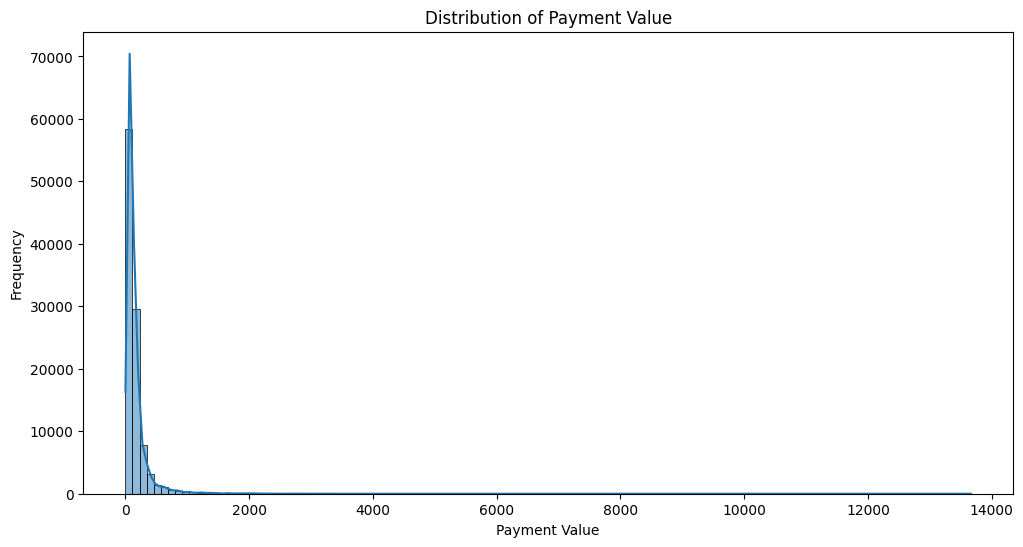

In [40]:
plt.figure(figsize=(12, 6))
sns.histplot(order_payments_dataset['payment_value'], bins=120, kde=True)
plt.title('Distribution of Payment Value')
plt.xlabel('Payment Value')
plt.ylabel('Frequency')
plt.show()

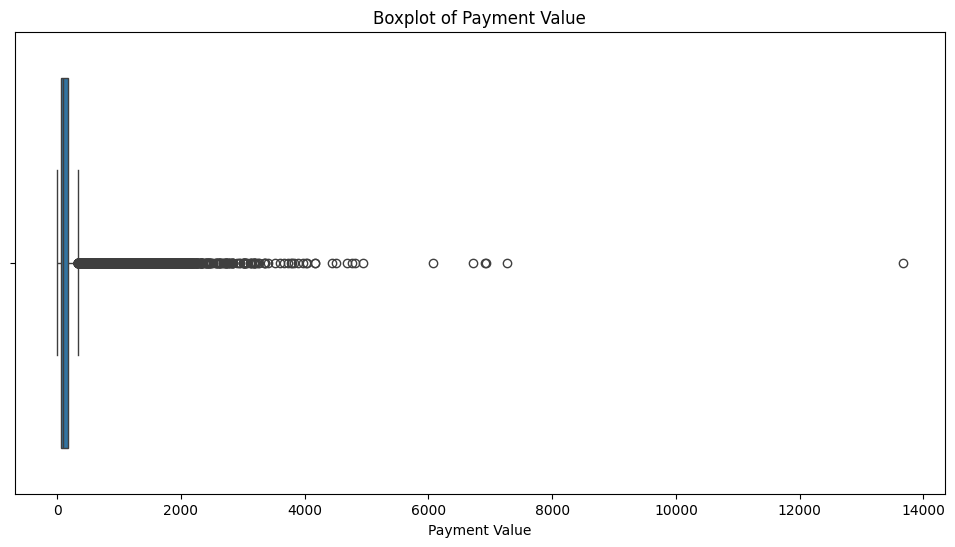

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=order_payments_dataset['payment_value'])
plt.title('Boxplot of Payment Value')
plt.xlabel('Payment Value')
plt.show()

In [42]:
print(f'Null values: {order_payments_dataset.isnull().sum()}')
print(f'\nDuplicated values: {order_payments_dataset.duplicated().sum()}')

Null values: order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Duplicated values: 0


**Insight**
- terdapat `103886` baris data dalam `order_payments_dataset`
- nama kolom sudah mendeskripsikan data di dalamnya
- jenis data pada kolom `payment_type` dapat dirubah ke dalam bentuk categorical
- distribusi data `payment_value` tidak normal, tetapi untuk mendapatkan insight data, distribusi tidak akan dinormalisasi
- tidak terdapat data kosong atau data duplikat

### Cleaning Data

#### 1. Customers Dataset

##### a. Memilih fitur yang berguna dalam analisis

In [43]:
customers_dataset_clean = customers_dataset.drop(columns=['customer_id', 'customer_unique_id'])
customers_dataset_clean.head()

customer_zip_code_prefix          customer_city customer_state
0                     14409                 franca             SP
1                      9790  sao bernardo do campo             SP
2                      1151              sao paulo             SP
3                      8775        mogi das cruzes             SP
4                     13056               campinas             SP

tidak terdapat anomali data pada `customers_dataset`. sehingga hanya perlu menghapus fitur (kolom) yang tidak diperlukan dalam analisis

#### 2. Geolocation Dataset

##### a. Menghapus data duplikat

In [44]:
geolocation_dataset_clean = geolocation_dataset.drop_duplicates(keep='first')
print(f'duplicated data: {geolocation_dataset_clean.duplicated().sum()}')

duplicated data: 0


menghapus data duplikat dengan tetap menjaga data pertama

#### 3. Order Items Dataset

##### a. Merubah *data type*

In [45]:
order_items_dataset_clean = order_items_dataset.drop(columns=['order_id', 'order_item_id'])
order_items_dataset_clean['shipping_limit_date'] = pd.to_datetime(order_items_dataset_clean['shipping_limit_date'])
order_items_dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   product_id           112650 non-null  object        
 1   seller_id            112650 non-null  object        
 2   shipping_limit_date  112650 non-null  datetime64[ns]
 3   price                112650 non-null  float64       
 4   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 4.3+ MB


mengubah jenis data kolom `shipping_limit_date`ke jenis data datetime

##### b. Memisahkan tanggal dan waktu menjadi kolom berbeda

In [46]:
shipping_limit_date_only = pd.to_datetime(order_items_dataset_clean['shipping_limit_date'].dt.date)
shipping_limit_time = order_items_dataset_clean['shipping_limit_date'].dt.time

In [47]:
order_items_dataset_clean['shipping_limit_date_only'] = shipping_limit_date_only
order_items_dataset_clean['shipping_limit_time'] = shipping_limit_time
order_items_dataset_clean.head()

product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value shipping_limit_date_only  \
0 2017-09-19 09:45:35   58.90          13.29               2017-09-19   
1 2017-05-03 11:05:13  239.90          19.93               2017-05-03   
2 2018-01-18 14:48:30  199.00          17.87               2018-01-18   
3 2018-08-15 10:10:18   12.99          12.79               2018-08-15   
4 2017-02-13 13:57:51  199.90          18.14               2017-02-13   

  shipping_limit_time  
0            09:45:35  
1            11:05:13  
2            14:48:30  
3            10:10:18  
4            13:57:51

##### c. Memilih fitur yang berguna dalam analisis

In [48]:
order_items_dataset_clean = order_items_dataset_clean.drop(columns=['product_id', 'seller_id'])

In [49]:
order_items_dataset_clean.head()

shipping_limit_date   price  freight_value shipping_limit_date_only  \
0 2017-09-19 09:45:35   58.90          13.29               2017-09-19   
1 2017-05-03 11:05:13  239.90          19.93               2017-05-03   
2 2018-01-18 14:48:30  199.00          17.87               2018-01-18   
3 2018-08-15 10:10:18   12.99          12.79               2018-08-15   
4 2017-02-13 13:57:51  199.90          18.14               2017-02-13   

  shipping_limit_time  
0            09:45:35  
1            11:05:13  
2            14:48:30  
3            10:10:18  
4            13:57:51

#### 4. Order Reviews Dataset

##### a. Menghapus data kosong dan memilih fitur yang berguna dalam analisis

In [50]:
order_reviews_dataset_clean = order_reviews_dataset.drop(columns=['review_id', 'review_comment_title', 'order_id', 'review_comment_message'])
print(f'Null values: {order_reviews_dataset_clean.isnull().sum()}')

Null values: review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


menghilangkan kolom `review_comment_title` dan `review_comment_message` dikarenakan nilai kosong yang terlalu banyak pada kolom tersebut. apabila menghapus baris dengan nilai kosong, maka berpotensi menghilangkan nilai data dari kolom yang lain dan dataset secara keseluruhan

##### b. Merubah jenis data

In [51]:
order_reviews_dataset_clean[['review_creation_date', 'review_answer_timestamp']] = order_reviews_dataset_clean[['review_creation_date', 'review_answer_timestamp']].apply(pd.to_datetime)
order_reviews_dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_score             99224 non-null  int64         
 1   review_creation_date     99224 non-null  datetime64[ns]
 2   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 2.3 MB


#### 5. Order Dataset

##### a. Merubah jenis data

In [52]:
orders_dataset_clean = orders_dataset.copy()
orders_dataset_clean[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']] = orders_dataset[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']].apply(pd.to_datetime)
orders_dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


merubah jenis data pada kolom yang memiliki data berupa tanggal dan/atau tanggal dan waktu ke jenis data `datetime`

In [53]:
orders_dataset_clean['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [54]:
orders_dataset_clean['order_status'] = orders_dataset['order_status'].astype('category')
orders_dataset_clean['order_status'].cat.categories

Index(['approved', 'canceled', 'created', 'delivered', 'invoiced',
       'processing', 'shipped', 'unavailable'],
      dtype='object')

In [55]:
orders_dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  category      
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), object(2)
memory usage: 5.4+ MB


merubah jenis data kolom `order_status` ke jenis data `category`

##### b. Membersihkan data kosong

In [56]:
print(f'Percentage of total null values: {(orders_dataset_clean.isnull().sum().sum() / orders_dataset_clean.size) * 100:.2f}%')

Percentage of total null values: 0.62%


persentase jumlah data kosong terhadpat keseluruhan jumlah data adalah `0.62%`. angka yang relative kecil, sehingga data kosong dapat dihapus tanpa menghilangkan atau mengurangi informasi dalam dataset tersebut

In [57]:
orders_dataset_clean = orders_dataset_clean.dropna()
print(f'Null values:\n{orders_dataset_clean.isna().sum()}')

Null values:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


##### c. Memilih fitur yang berguna dalam analisis

In [58]:
orders_dataset_clean.drop(columns=['order_id', 'customer_id'], inplace=True)

In [59]:
orders_dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_status                   96461 non-null  category      
 1   order_purchase_timestamp       96461 non-null  datetime64[ns]
 2   order_approved_at              96461 non-null  datetime64[ns]
 3   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 4   order_delivered_customer_date  96461 non-null  datetime64[ns]
 5   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5)
memory usage: 4.5 MB


#### 6. Products Dataset

##### a. Mengubah nama kolom

In [60]:
products_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [61]:
products_dataset_clean = products_dataset.copy()
products_dataset_clean = products_dataset_clean.rename(columns={
	'product_description_lenght': 'product_description_length',
	'product_name_lenght': 'product_name_length'
})

products_dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


memperbaiki grammar pada nama kolom

##### b. Membersihkan data kosong

In [62]:
print(f'Percentage of total null values: {(products_dataset_clean.isnull().sum().sum() / products_dataset_clean.size) * 100:.2f}%')

Percentage of total null values: 0.83%


persentase jumlah data kosong terhadpat keseluruhan jumlah data adalah `0.83%`. angka yang relative kecil, sehingga data kosong dapat dihapus tanpa menghilangkan atau mengurangi informasi dalam dataset tersebut

In [63]:
products_dataset_clean = products_dataset_clean.dropna()
print(f'Null values:\n{products_dataset_clean.isna().sum()}')

Null values:
product_id                    0
product_category_name         0
product_name_length           0
product_description_length    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


##### c. Memilih fitur yang berguna dalam analisis

In [64]:
products_dataset_clean = products_dataset_clean.drop(columns=['product_id'])
products_dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_category_name       32340 non-null  object 
 1   product_name_length         32340 non-null  float64
 2   product_description_length  32340 non-null  float64
 3   product_photos_qty          32340 non-null  float64
 4   product_weight_g            32340 non-null  float64
 5   product_length_cm           32340 non-null  float64
 6   product_height_cm           32340 non-null  float64
 7   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(1)
memory usage: 2.2+ MB


#### 7. Sellers Dataset

In [65]:
sellers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


##### a. Memilih fitur yang berguna dalam analisis

In [66]:
sellers_dataset_clean = sellers_dataset.drop(columns=['seller_id'])
sellers_dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_zip_code_prefix  3095 non-null   int64 
 1   seller_city             3095 non-null   object
 2   seller_state            3095 non-null   object
dtypes: int64(1), object(2)
memory usage: 72.7+ KB


#### 8. Order Payments Dataset

##### a. Memilih fitur yang berguna dalam analisis

In [67]:
order_payments_dataset_clean = order_payments_dataset.drop(columns=['order_id', 'payment_sequential', 'payment_installments'])
order_payments_dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   payment_type   103886 non-null  object 
 1   payment_value  103886 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.6+ MB


**Insight**<br>
kolom `payment_sequential` dan `payment_installments` di hapus dikarenakan kurangnya kejelasan mengenai fungsi atau kegunaan dari data pada kolom tersebut

##### b. Merubah jenis data

In [68]:
order_payments_dataset_clean['payment_type'] = order_payments_dataset_clean['payment_type'].astype('category')
order_payments_dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   payment_type   103886 non-null  category
 1   payment_value  103886 non-null  float64 
dtypes: category(1), float64(1)
memory usage: 913.4 KB


## Exploratory Data Analysis (EDA)

### Explore Univariate Analysis

<Axes: ylabel='customer_state'>

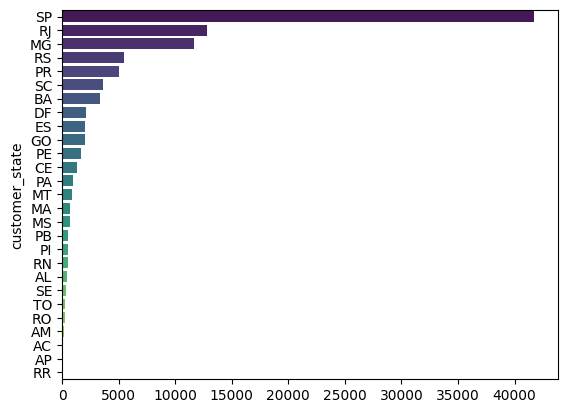

In [69]:
state_count = customers_dataset_clean.groupby('customer_state').size().sort_values(ascending=False)

sns.barplot(x=state_count.values, y=state_count.index, palette='viridis')

**Insight**<br>
terdapat kesenjangan cukup besar dalam jumlah customer pada urutan pertama dengan urutan selanjutnya.

In [70]:
order_items_dataset_clean.describe()

shipping_limit_date          price  freight_value  \
count                         112650  112650.000000  112650.000000   
mean   2018-01-07 15:36:52.192685312     120.653739      19.990320   
min              2016-09-19 00:15:34       0.850000       0.000000   
25%       2017-09-20 20:57:27.500000      39.900000      13.080000   
50%              2018-01-26 13:59:35      74.990000      16.260000   
75%    2018-05-10 14:34:00.750000128     134.900000      21.150000   
max              2020-04-09 22:35:08    6735.000000     409.680000   
std                              NaN     183.633928      15.806405   

            shipping_limit_date_only  
count                         112650  
mean   2018-01-07 02:28:41.480692480  
min              2016-09-19 00:00:00  
25%              2017-09-20 00:00:00  
50%              2018-01-26 00:00:00  
75%              2018-05-10 00:00:00  
max              2020-04-09 00:00:00  
std                              NaN

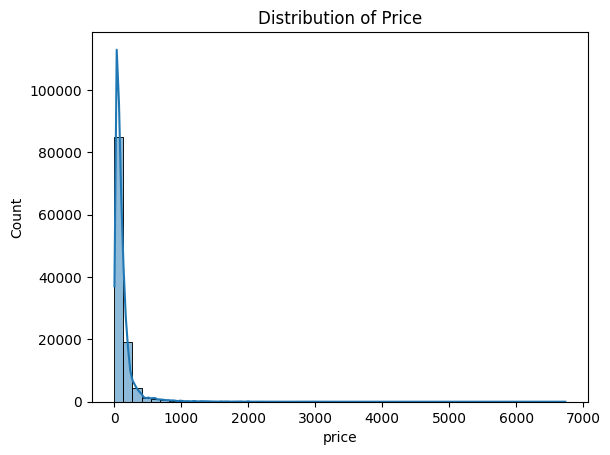

In [71]:
plt.plot(figsize=(12, 6))
sns.histplot(order_items_dataset_clean['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.show()

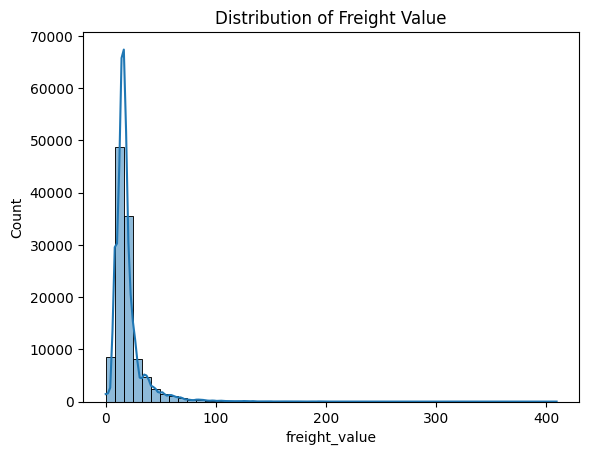

In [72]:
plt.plot(figsize=(12, 6))
sns.histplot(order_items_dataset_clean['freight_value'], bins=50, kde=True)
plt.title('Distribution of Freight Value')
plt.show()

**Insight**<br>
Baik harga maupun berat barang memilik distribusi yang *over right-skewed*. Ini berarti banyak harga yang memmiliki harga rendah dan berat barang yang cukup ringan. Mengindikasikan, sedikitnya jumlah pesanana dalam jumlah besar baik dari segi harga maupun berat

In [73]:
order_reviews_dataset_clean.describe()

review_score           review_creation_date  \
count  99224.000000                          99224   
mean       4.086421  2018-01-12 20:49:23.948238336   
min        1.000000            2016-10-02 00:00:00   
25%        4.000000            2017-09-23 00:00:00   
50%        5.000000            2018-02-02 00:00:00   
75%        5.000000            2018-05-16 00:00:00   
max        5.000000            2018-08-31 00:00:00   
std        1.347579                            NaN   

             review_answer_timestamp  
count                          99224  
mean   2018-01-16 00:23:56.977938688  
min              2016-10-07 18:32:28  
25%    2017-09-27 01:53:27.249999872  
50%       2018-02-04 22:41:47.500000  
75%       2018-05-20 12:11:21.500000  
max              2018-10-29 12:27:35  
std                              NaN

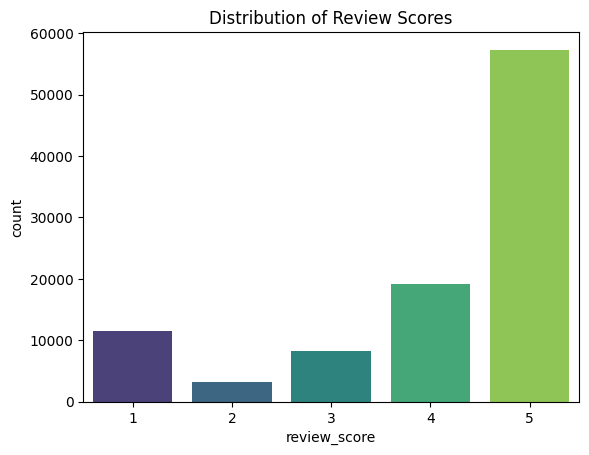

In [74]:
sns.countplot(x='review_score', data=order_reviews_dataset_clean, palette='viridis')
plt.title('Distribution of Review Scores')
plt.show()

**Insight**<br>
Rata-rata nilai review yang diberikan adalah `4.09`, tetapi kebanyakan review yang telah diberikan berdasarkan plot adalah `5` alias nilai tertinggi. Hal ini mengindikasikan bahwa kebanyakan pelanggan telah puas dengan produk yang dijual

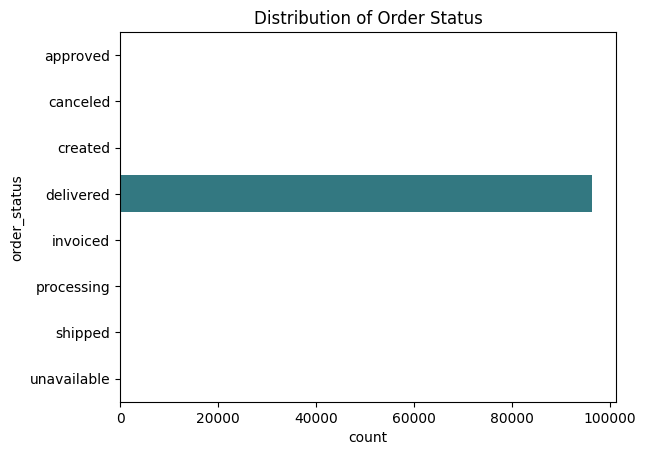

In [75]:
sns.countplot(orders_dataset_clean['order_status'], palette='viridis')
plt.title('Distribution of Order Status')
plt.show()

In [76]:
orders_dataset_clean['order_status'].value_counts()

order_status
delivered      96455
canceled           6
approved           0
created            0
invoiced           0
processing         0
shipped            0
unavailable        0
Name: count, dtype: int64

**Insight**<br>
Hampir semua pesanan telah dikirimkan, dan hanya ada `6` pesanan yang dibatalkan

In [77]:
len(product_category_name_translation['product_category_name'].unique())

71

**Insight**<br>
Terdapat `71` kategori barang yang dijual

In [78]:
products_dataset_clean.describe()

product_name_length  product_description_length  product_photos_qty  \
count         32340.000000                32340.000000        32340.000000   
mean             48.476592                  771.492393            2.188961   
std              10.245699                  635.124831            1.736787   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32340.000000       32340.000000       32340.000000   
mean        2276.956586          30.854545          16.958813   
std         4279.291845          16.955965          13.636115   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32340.000000  
mean          23.208596  
std           12.078762  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

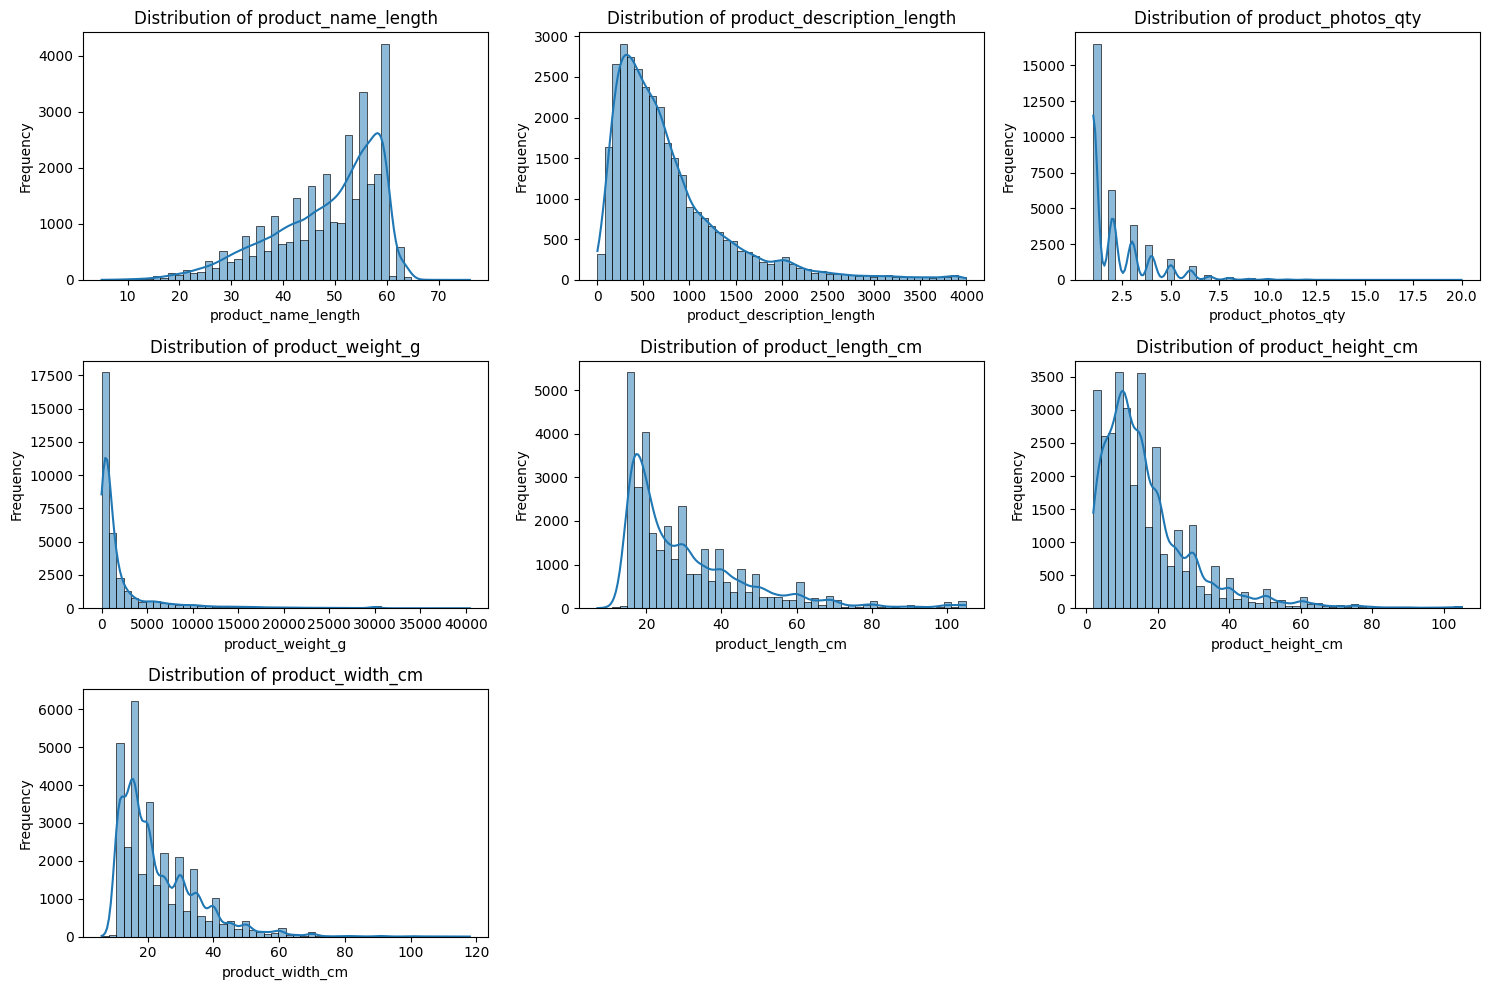

In [79]:
numerical_columns = products_dataset_clean.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(products_dataset_clean[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Insight**<br>
Hampir data pada `products_dataset` memiliki distribusi *right-skewed* kecuali pada data `product_name_length` yang memiliki distribusi *left-skewed*

In [80]:
order_payments_dataset_clean.describe()

payment_value
count  103886.000000
mean      154.100380
std       217.494064
min         0.000000
25%        56.790000
50%       100.000000
75%       171.837500
max     13664.080000

In [81]:
order_payments_dataset_clean['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [82]:
order_payments_dataset_clean.groupby('payment_type').agg({'payment_value': 'sum'}).sort_values(by='payment_value', ascending=False)


payment_value
payment_type               
credit_card     12542084.19
boleto           2869361.27
voucher           379436.87
debit_card        217989.79
not_defined            0.00

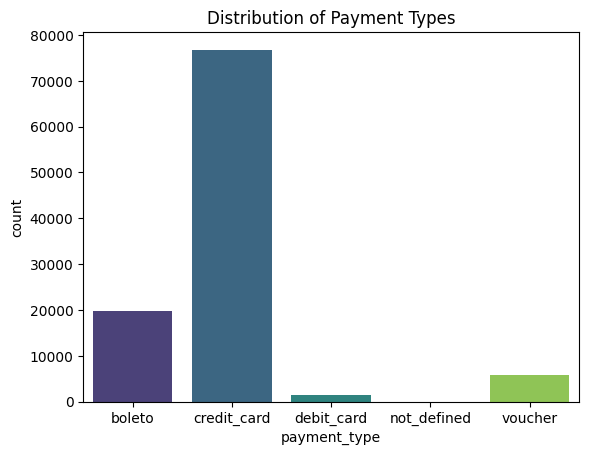

In [83]:
sns.countplot(x='payment_type', data=order_payments_dataset_clean, palette='viridis')
plt.title('Distribution of Payment Types')
plt.show()

**Insight**<br>
Kebanyakan pelanggan melakukan pembayaran melalui *credit_card* dengan total pembayaran melalui *credit_card* sebesar `12542084.19`. Sedangkan jenis pembayaran paling sedikit digunakan adalah melalui *debit_card* dengan total pembayaran melalui *debit_card* hanya sebesar `217989.79`

### Explore Bivariate Analysis

In [84]:
customers_geo = customers_dataset_clean.merge(geolocation_dataset_clean, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')
customers_geo = customers_geo.drop(columns=['geolocation_city', 'geolocation_state', 'geolocation_zip_code_prefix'])
customers_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10327728 entries, 0 to 10327727
Data columns (total 5 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   customer_zip_code_prefix  int64  
 1   customer_city             object 
 2   customer_state            object 
 3   geolocation_lat           float64
 4   geolocation_lng           float64
dtypes: float64(2), int64(1), object(2)
memory usage: 394.0+ MB


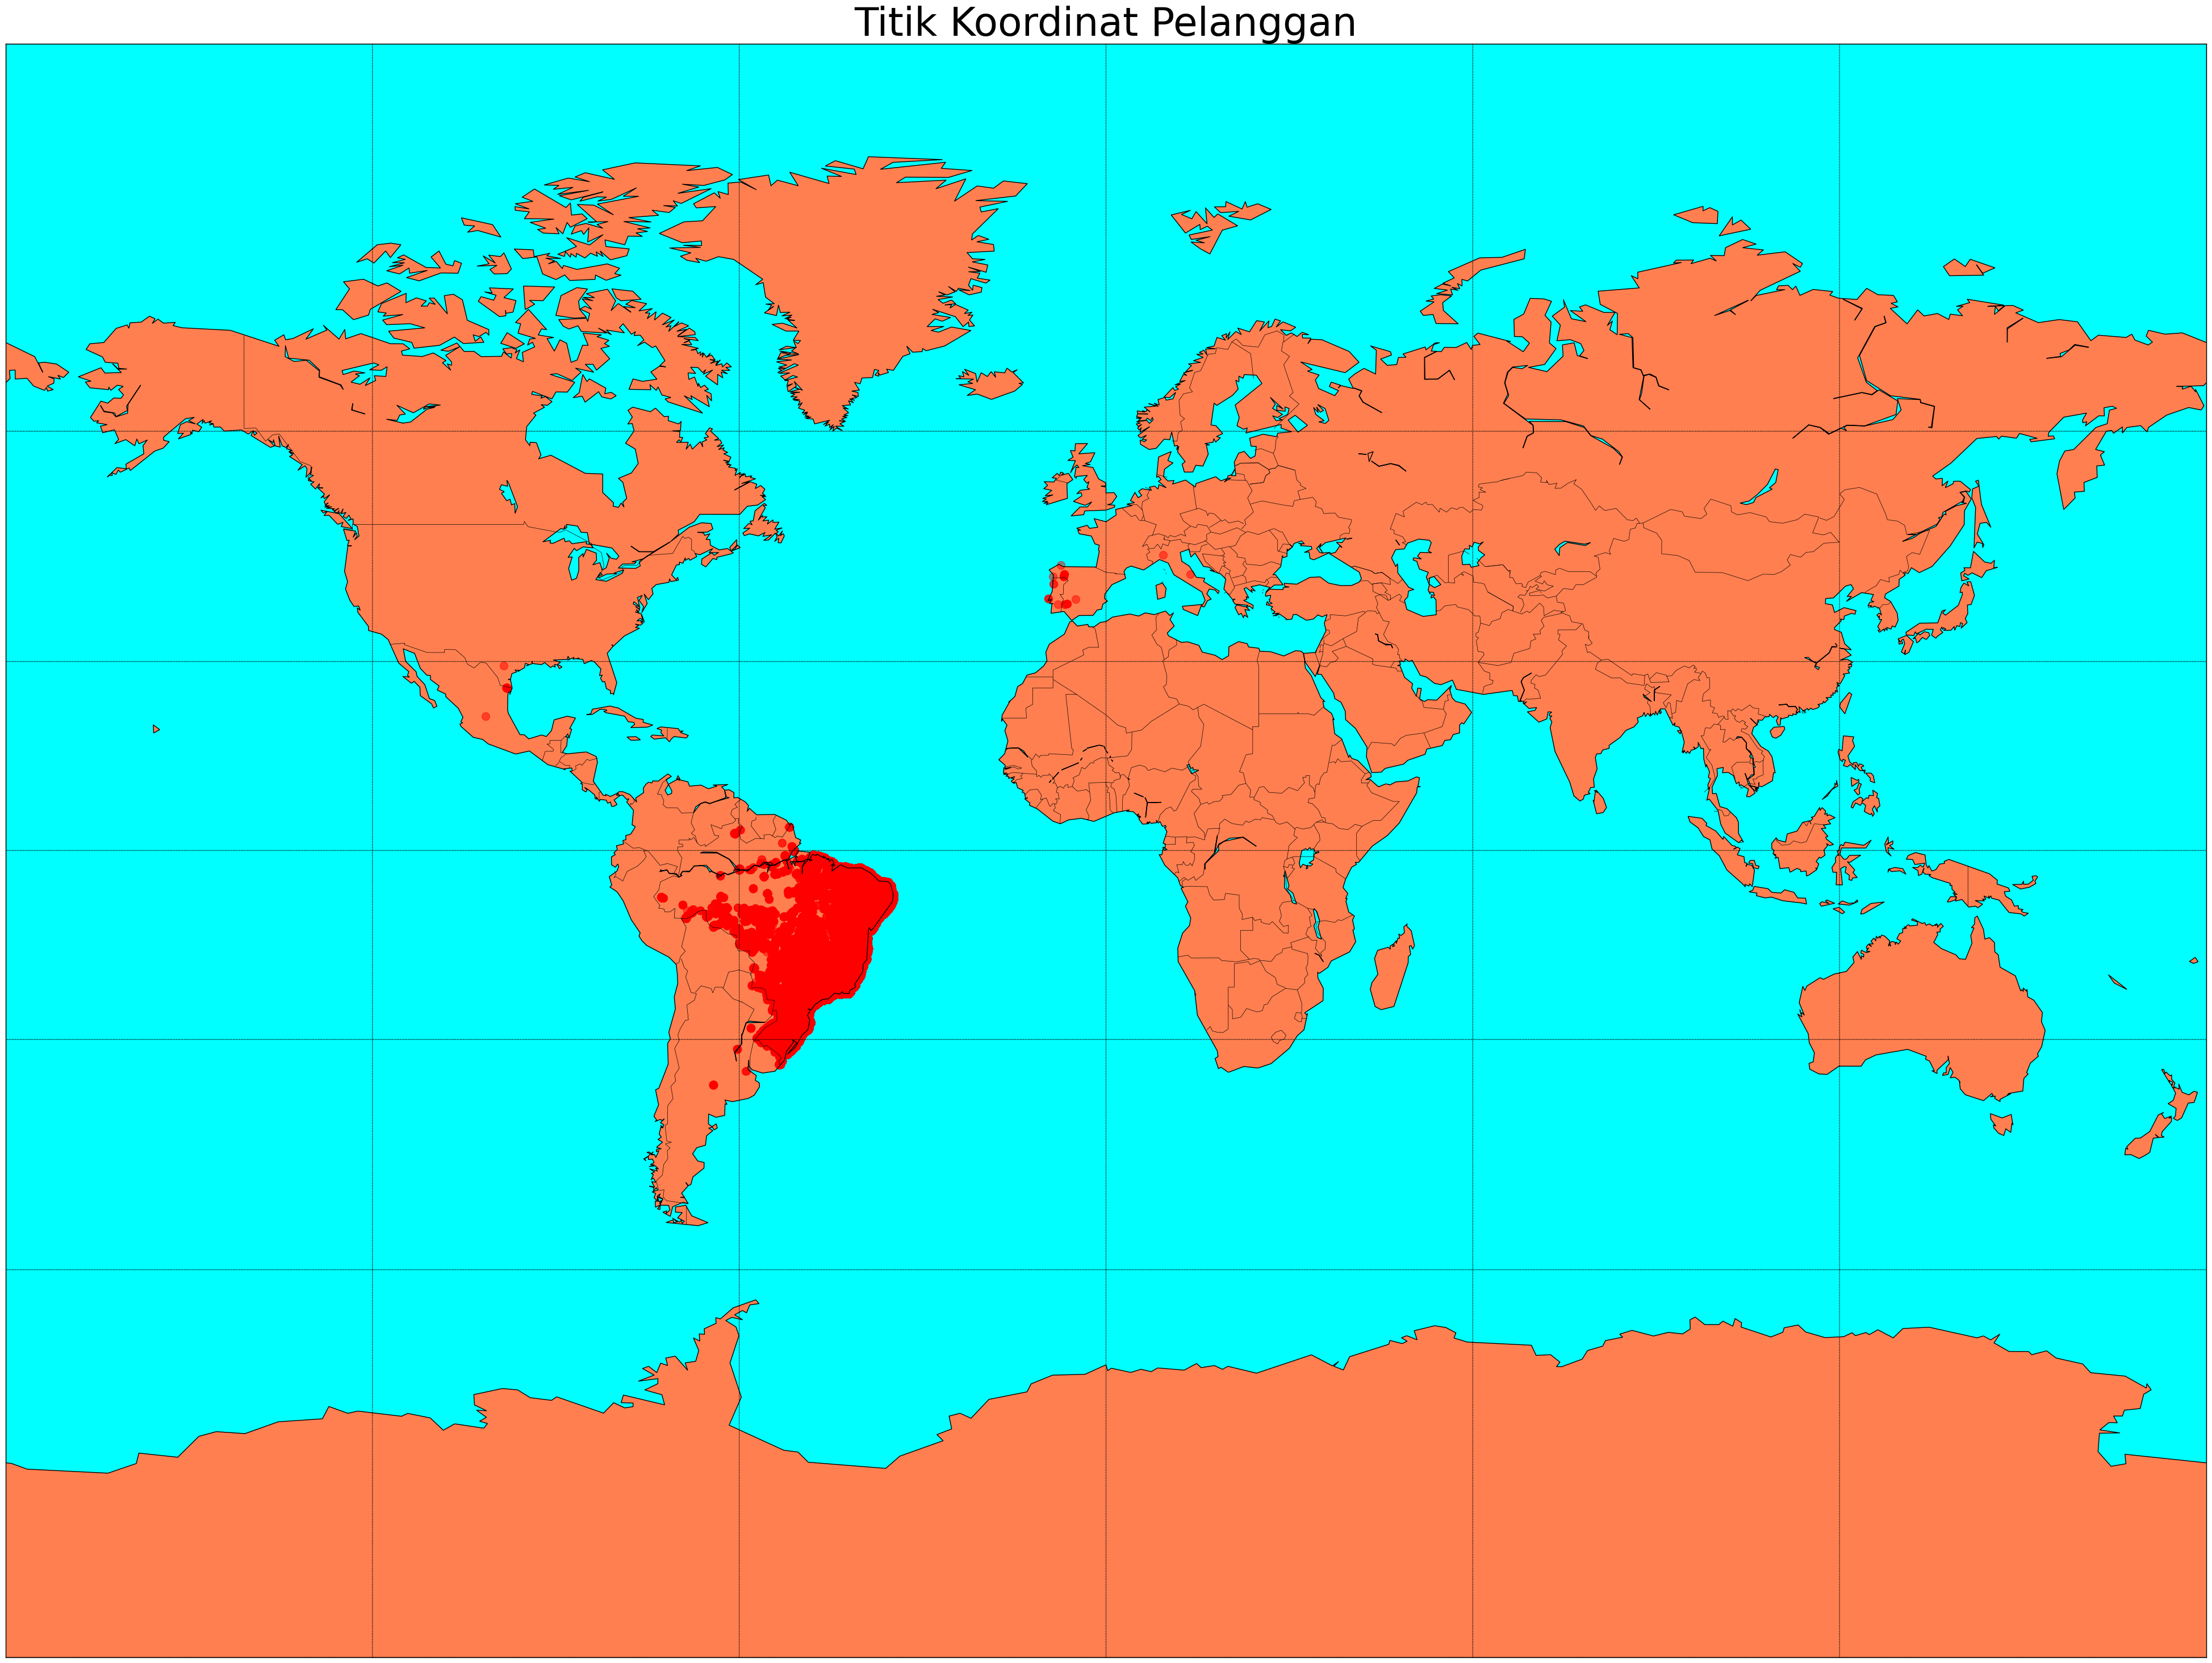

In [85]:
plot_map(customers_geo, 'geolocation_lat', 'geolocation_lng', 'Titik Koordinat Pelanggan')

In [86]:
customer_pivot_state = customers_geo.groupby('customer_state').size().sort_values(ascending=False)

Text(0.5, 1.0, 'Number of Customers per State')

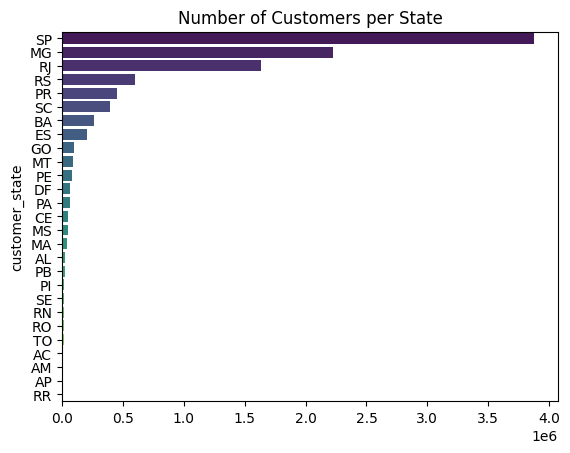

In [87]:
sns.barplot(x=customer_pivot_state.values, y=customer_pivot_state.index, palette='viridis')
plt.title('Number of Customers per State')

**Insight**<br>
Banyak pelanggan yang berada di negara Brazil dengan negara bagian (*state*) yang memiliki pelanggan terbanyak adalah **SP**

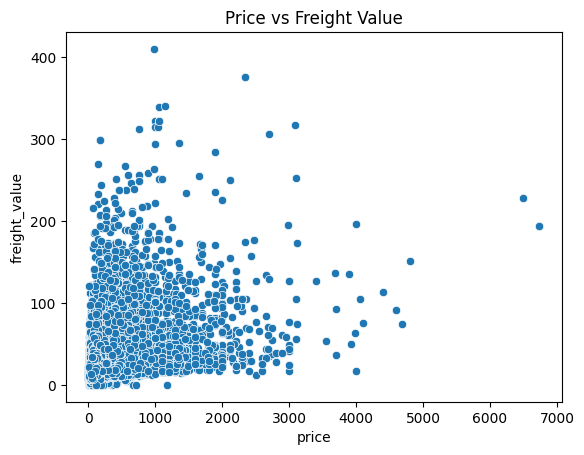

In [88]:
sns.scatterplot(x='price', y='freight_value', data=order_items_dataset_clean)
plt.title('Price vs Freight Value')
plt.show()

**Insight**<br>
Hubungan antara harga barang dengan berat barang cenderung tidak berpola, berdasarkan *scatter plot*, tidak terdapat hubungan linier antara kedua kolom tersebut

In [89]:
orders_dataset_combine = orders_dataset.merge(order_reviews_dataset, how='inner', on='order_id')
orders_dataset_combine = orders_dataset_combine.merge(order_items_dataset, how='inner', on='order_id')
orders_dataset_combine = orders_dataset_combine.merge(order_payments_dataset, how='inner', on='order_id')
orders_dataset_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   review_id                      117329 non-null  object 
 9   review_score                   117329 non-null  int64  
 10  review_comment_title           13892 non-null   object 
 11  review_comment_message         49679 non-null   object 
 12  review_creation_date          

In [90]:
orders_dataset_combine = orders_dataset_combine.drop(columns=['order_id', 'customer_id', 'review_id', 'review_comment_title', 'review_comment_message', 'order_item_id', 'product_id', 'seller_id', 'payment_sequential', 'payment_installments'])
orders_dataset_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_status                   117329 non-null  object 
 1   order_purchase_timestamp       117329 non-null  object 
 2   order_approved_at              117314 non-null  object 
 3   order_delivered_carrier_date   116094 non-null  object 
 4   order_delivered_customer_date  114858 non-null  object 
 5   order_estimated_delivery_date  117329 non-null  object 
 6   review_score                   117329 non-null  int64  
 7   review_creation_date           117329 non-null  object 
 8   review_answer_timestamp        117329 non-null  object 
 9   shipping_limit_date            117329 non-null  object 
 10  price                          117329 non-null  float64
 11  freight_value                  117329 non-null  float64
 12  payment_type                  

In [91]:
orders_dataset_combine = orders_dataset_combine.dropna()
orders_dataset_combine = orders_dataset_combine.drop_duplicates(keep='first')
orders_dataset_combine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103077 entries, 0 to 117328
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_status                   103077 non-null  object 
 1   order_purchase_timestamp       103077 non-null  object 
 2   order_approved_at              103077 non-null  object 
 3   order_delivered_carrier_date   103077 non-null  object 
 4   order_delivered_customer_date  103077 non-null  object 
 5   order_estimated_delivery_date  103077 non-null  object 
 6   review_score                   103077 non-null  int64  
 7   review_creation_date           103077 non-null  object 
 8   review_answer_timestamp        103077 non-null  object 
 9   shipping_limit_date            103077 non-null  object 
 10  price                          103077 non-null  float64
 11  freight_value                  103077 non-null  float64
 12  payment_type                   1030

In [92]:
orders_dataset_combine.head()

order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date  review_score review_creation_date  \
0           2017-10-18 00:00:00             4  2017-10-11 00:00:00   
1           2017-10-18 00:00:00             4  2017-10-11 00:00:00   
2           2017-10-18 00:00:00             4  2017-10-11 00:00:00   
3           2018-08-13 00:00:00             4  2018-08-08 00:00:00   
4           2018-09-04 00:00:00             5  2018-08-18 00:00:00   

  review_answer_timestamp  shipping_limit_date   price  freight_value  \
0     2017-10-12 03:43:48  2017-10-06 11:07:15   29.99           8.72   
1     2017-10-12 03:43:48  2017-10-06 11:07:15   29.99           8.72   
2     2017-10-12 03:43:48  2017-10-06 11:07:15   29.99           8.72   
3     2018-08-08 18:37:50  2018-07-30 03:24:27  118.70          22.76   
4     2018-08-22 19:07:58  2018-08-13 08:55:23  159.90          19.22   

  payment_type  payment_value  
0  credit_card          18.12  
1      voucher           2.00  
2      voucher          18.59  
3       boleto         141.46  
4  credit_card         179.12

menggabungkan beberapa *orders* dataset untuk mendapatkan *insight* yang lebih mendalam mengenai hubungan antara beberapa variable yang berasar dari data yang berbeda

In [93]:
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp', 'shipping_limit_date']
for column in date_columns:
    orders_dataset_combine[column] = pd.to_datetime(orders_dataset_combine[column])

orders_dataset_combine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103077 entries, 0 to 117328
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_status                   103077 non-null  object        
 1   order_purchase_timestamp       103077 non-null  datetime64[ns]
 2   order_approved_at              103077 non-null  datetime64[ns]
 3   order_delivered_carrier_date   103077 non-null  datetime64[ns]
 4   order_delivered_customer_date  103077 non-null  datetime64[ns]
 5   order_estimated_delivery_date  103077 non-null  datetime64[ns]
 6   review_score                   103077 non-null  int64         
 7   review_creation_date           103077 non-null  datetime64[ns]
 8   review_answer_timestamp        103077 non-null  datetime64[ns]
 9   shipping_limit_date            103077 non-null  datetime64[ns]
 10  price                          103077 non-null  float64       
 11  freig

In [94]:
delta_purchase_approved = orders_dataset_combine['order_approved_at'] - orders_dataset_combine['order_purchase_timestamp']
delta_approved_delivered = orders_dataset_combine['order_delivered_customer_date'] - orders_dataset_combine['order_approved_at']
delta_delivered_estimated = orders_dataset_combine['order_estimated_delivery_date'] - orders_dataset_combine['order_delivered_customer_date']

orders_dataset_combine['delta_purchase_approved'] = delta_purchase_approved
orders_dataset_combine['delta_approved_delivered'] = delta_approved_delivered
orders_dataset_combine['delta_delivered_estimated'] = delta_delivered_estimated

orders_dataset_combine.head()

order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date  review_score review_creation_date  \
0                    2017-10-18             4           2017-10-11   
1                    2017-10-18             4           2017-10-11   
2                    2017-10-18             4           2017-10-11   
3                    2018-08-13             4           2018-08-08   
4                    2018-09-04             5           2018-08-18   

  review_answer_timestamp shipping_limit_date   price  freight_value  \
0     2017-10-12 03:43:48 2017-10-06 11:07:15   29.99           8.72   
1     2017-10-12 03:43:48 2017-10-06 11:07:15   29.99           8.72   
2     2017-10-12 03:43:48 2017-10-06 11:07:15   29.99           8.72   
3     2018-08-08 18:37:50 2018-07-30 03:24:27  118.70          22.76   
4     2018-08-22 19:07:58 2018-08-13 08:55:23  159.90          19.22   

  payment_type  payment_value delta_purchase_approved  \
0  credit_card          18.12         0 days 00:10:42   
1      voucher           2.00         0 days 00:10:42   
2      voucher          18.59         0 days 00:10:42   
3       boleto         141.46         1 days 06:42:50   
4  credit_card         179.12         0 days 00:16:34   

  delta_approved_delivered delta_delivered_estimated  
0          8 days 10:17:58           7 days 02:34:47  
1          8 days 10:17:58           7 days 02:34:47  
2          8 days 10:17:58           7 days 02:34:47  
3         12 days 12:03:18           5 days 08:32:15  
4          9 days 09:11:06          17 days 05:53:31

menghitung selisih hari dari:
- `order_approved_at` - `order_purchase_timestamp` untuk mengetahui seberapa lama pesanan di setujui setelah pelanggan melakukan pembelian
- `order_delivered_cusomter_date` - `order_approved_at` untuk mengetahui seberapa lama pesanan diantar setelah pesanan disetujui
- `order_estimated_delivery_date` - `order_delivered_customer_date` untuk mengetahui apakah pengiriman lebih cepat atau lebih lambat dari perkiraan pengiriman (apabila negative, berarti lebih lamat, apabila positif berarti lebih cepat)

In [95]:
orders_dataset_combine[['delta_approved_delivered', 'delta_delivered_estimated', 'delta_purchase_approved']].describe()

delta_approved_delivered   delta_delivered_estimated  \
count                      103077                      103077   
mean   12 days 01:14:51.655956226  11 days 07:59:59.361758685   
std     9 days 09:29:08.098646992  10 days 02:56:56.976525248   
min             -7 days +00:14:54         -189 days +00:35:53   
25%               6 days 07:02:05             6 days 12:00:10   
50%               9 days 19:49:58            12 days 01:19:20   
75%              15 days 01:31:21            16 days 07:11:25   
max             208 days 08:07:53           146 days 00:23:13   

         delta_purchase_approved  
count                     103077  
mean   0 days 10:13:04.513014542  
std    0 days 20:29:12.315891997  
min              0 days 00:00:00  
25%              0 days 00:12:53  
50%              0 days 00:20:25  
75%              0 days 14:20:51  
max             30 days 21:26:37

In [96]:
negative_delivery_indexes = orders_dataset_combine[orders_dataset_combine['delta_approved_delivered'] < pd.Timedelta(0)].index

print(f"\nTotal number of delivered - approved anomalies: {len(negative_delivery_indexes)}")


Total number of delivered - approved anomalies: 65


In [97]:
# Find indexes where delta_delivered_estimated is negative
negative_delivery_rows = orders_dataset_combine.loc[negative_delivery_indexes]
negative_delivery_rows.head()

order_status order_purchase_timestamp   order_approved_at  \
242     delivered      2018-07-21 12:49:32 2018-07-26 23:31:53   
570     delivered      2018-07-24 11:32:11 2018-07-29 23:30:52   
571     delivered      2018-07-24 11:32:11 2018-07-29 23:30:52   
2344    delivered      2018-08-09 17:36:47 2018-08-20 15:55:42   
4275    delivered      2018-01-30 09:43:45 2018-02-04 23:31:47   

     order_delivered_carrier_date order_delivered_customer_date  \
242           2018-07-24 12:57:00           2018-07-25 23:58:19   
570           2018-07-26 14:46:00           2018-07-27 18:55:57   
571           2018-07-26 14:46:00           2018-07-27 18:55:57   
2344          2018-08-14 13:26:00           2018-08-17 16:45:45   
4275          2018-01-31 19:48:44           2018-02-01 20:10:38   

     order_estimated_delivery_date  review_score review_creation_date  \
242                     2018-07-31             5           2018-08-01   
570                     2018-08-06             5           2018-08-08   
571                     2018-08-06             5           2018-08-08   
2344                    2018-09-06             3           2018-08-18   
4275                    2018-02-15             5           2018-02-07   

     review_answer_timestamp shipping_limit_date   price  freight_value  \
242      2018-08-01 18:41:07 2018-07-26 03:45:26   27.90           7.46   
570      2018-08-08 14:34:42 2018-07-31 12:55:27  196.80          12.40   
571      2018-08-08 14:34:42 2018-07-31 12:55:27  196.80          12.40   
2344     2018-08-20 10:24:58 2018-08-15 16:30:58  330.00          20.41   
4275     2018-02-08 18:36:42 2018-02-06 02:35:36   89.18           9.44   

     payment_type  payment_value delta_purchase_approved  \
242        boleto          35.36         5 days 10:42:21   
570   credit_card         109.20         5 days 11:58:41   
571       voucher         100.00         5 days 11:58:41   
2344   debit_card         333.91        10 days 22:18:55   
4275       boleto          98.62         5 days 13:48:02   

     delta_approved_delivered delta_delivered_estimated  
242         -1 days +00:26:26           5 days 00:01:41  
570         -3 days +19:25:05           9 days 05:04:03  
571         -3 days +19:25:05           9 days 05:04:03  
2344        -3 days +00:50:03          19 days 07:14:15  
4275        -4 days +20:38:51          13 days 03:49:22

In [98]:
min_late_delivery = orders_dataset_combine.loc[orders_dataset_combine['delta_delivered_estimated'].idxmin()]
pd.DataFrame(min_late_delivery)

65560
order_status                             delivered
order_purchase_timestamp       2018-02-23 14:57:35
order_approved_at              2018-02-23 15:16:14
order_delivered_carrier_date   2018-02-26 18:49:07
order_delivered_customer_date  2018-09-19 23:24:07
order_estimated_delivery_date  2018-03-15 00:00:00
review_score                                     2
review_creation_date           2018-03-17 00:00:00
review_answer_timestamp        2018-03-17 05:08:11
shipping_limit_date            2018-03-01 15:16:14
price                                       144.99
freight_value                                17.26
payment_type                           credit_card
payment_value                               162.25
delta_purchase_approved            0 days 00:18:39
delta_approved_delivered         208 days 08:07:53
delta_delivered_estimated      -189 days +00:35:53

**Insight**<br>
- terdapat data anomali dimana tanggal pengiriman lebih cepat dibandingkan dengan tanggal pesanan disetujui
- terdapat keterlambatan dari estimasi pengiriman dengan keterlambatan paling lama mencapai **189** hari

In [99]:
sellers_dataset_clean.head()

seller_zip_code_prefix        seller_city seller_state
0                   13023           campinas           SP
1                   13844         mogi guacu           SP
2                   20031     rio de janeiro           RJ
3                    4195          sao paulo           SP
4                   12914  braganca paulista           SP

In [100]:
sellers_geo = sellers_dataset_clean.merge(geolocation_dataset_clean, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')
sellers_geo.head()

seller_zip_code_prefix seller_city seller_state  \
0                   13023    campinas           SP   
1                   13023    campinas           SP   
2                   13023    campinas           SP   
3                   13023    campinas           SP   
4                   13023    campinas           SP   

   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                        13023       -22.898536       -47.063125   
1                        13023       -22.895499       -47.061944   
2                        13023       -22.891740       -47.060820   
3                        13023       -22.895762       -47.066144   
4                        13023       -22.896154       -47.062431   

  geolocation_city geolocation_state  
0         campinas                SP  
1         campinas                SP  
2         campinas                SP  
3         campinas                SP  
4         campinas                SP

In [101]:
sellers_geo = sellers_geo.drop(columns=['geolocation_city', 'geolocation_state', 'geolocation_zip_code_prefix'])
sellers_geo.head()

seller_zip_code_prefix seller_city seller_state  geolocation_lat  \
0                   13023    campinas           SP       -22.898536   
1                   13023    campinas           SP       -22.895499   
2                   13023    campinas           SP       -22.891740   
3                   13023    campinas           SP       -22.895762   
4                   13023    campinas           SP       -22.896154   

   geolocation_lng  
0       -47.063125  
1       -47.061944  
2       -47.060820  
3       -47.066144  
4       -47.062431

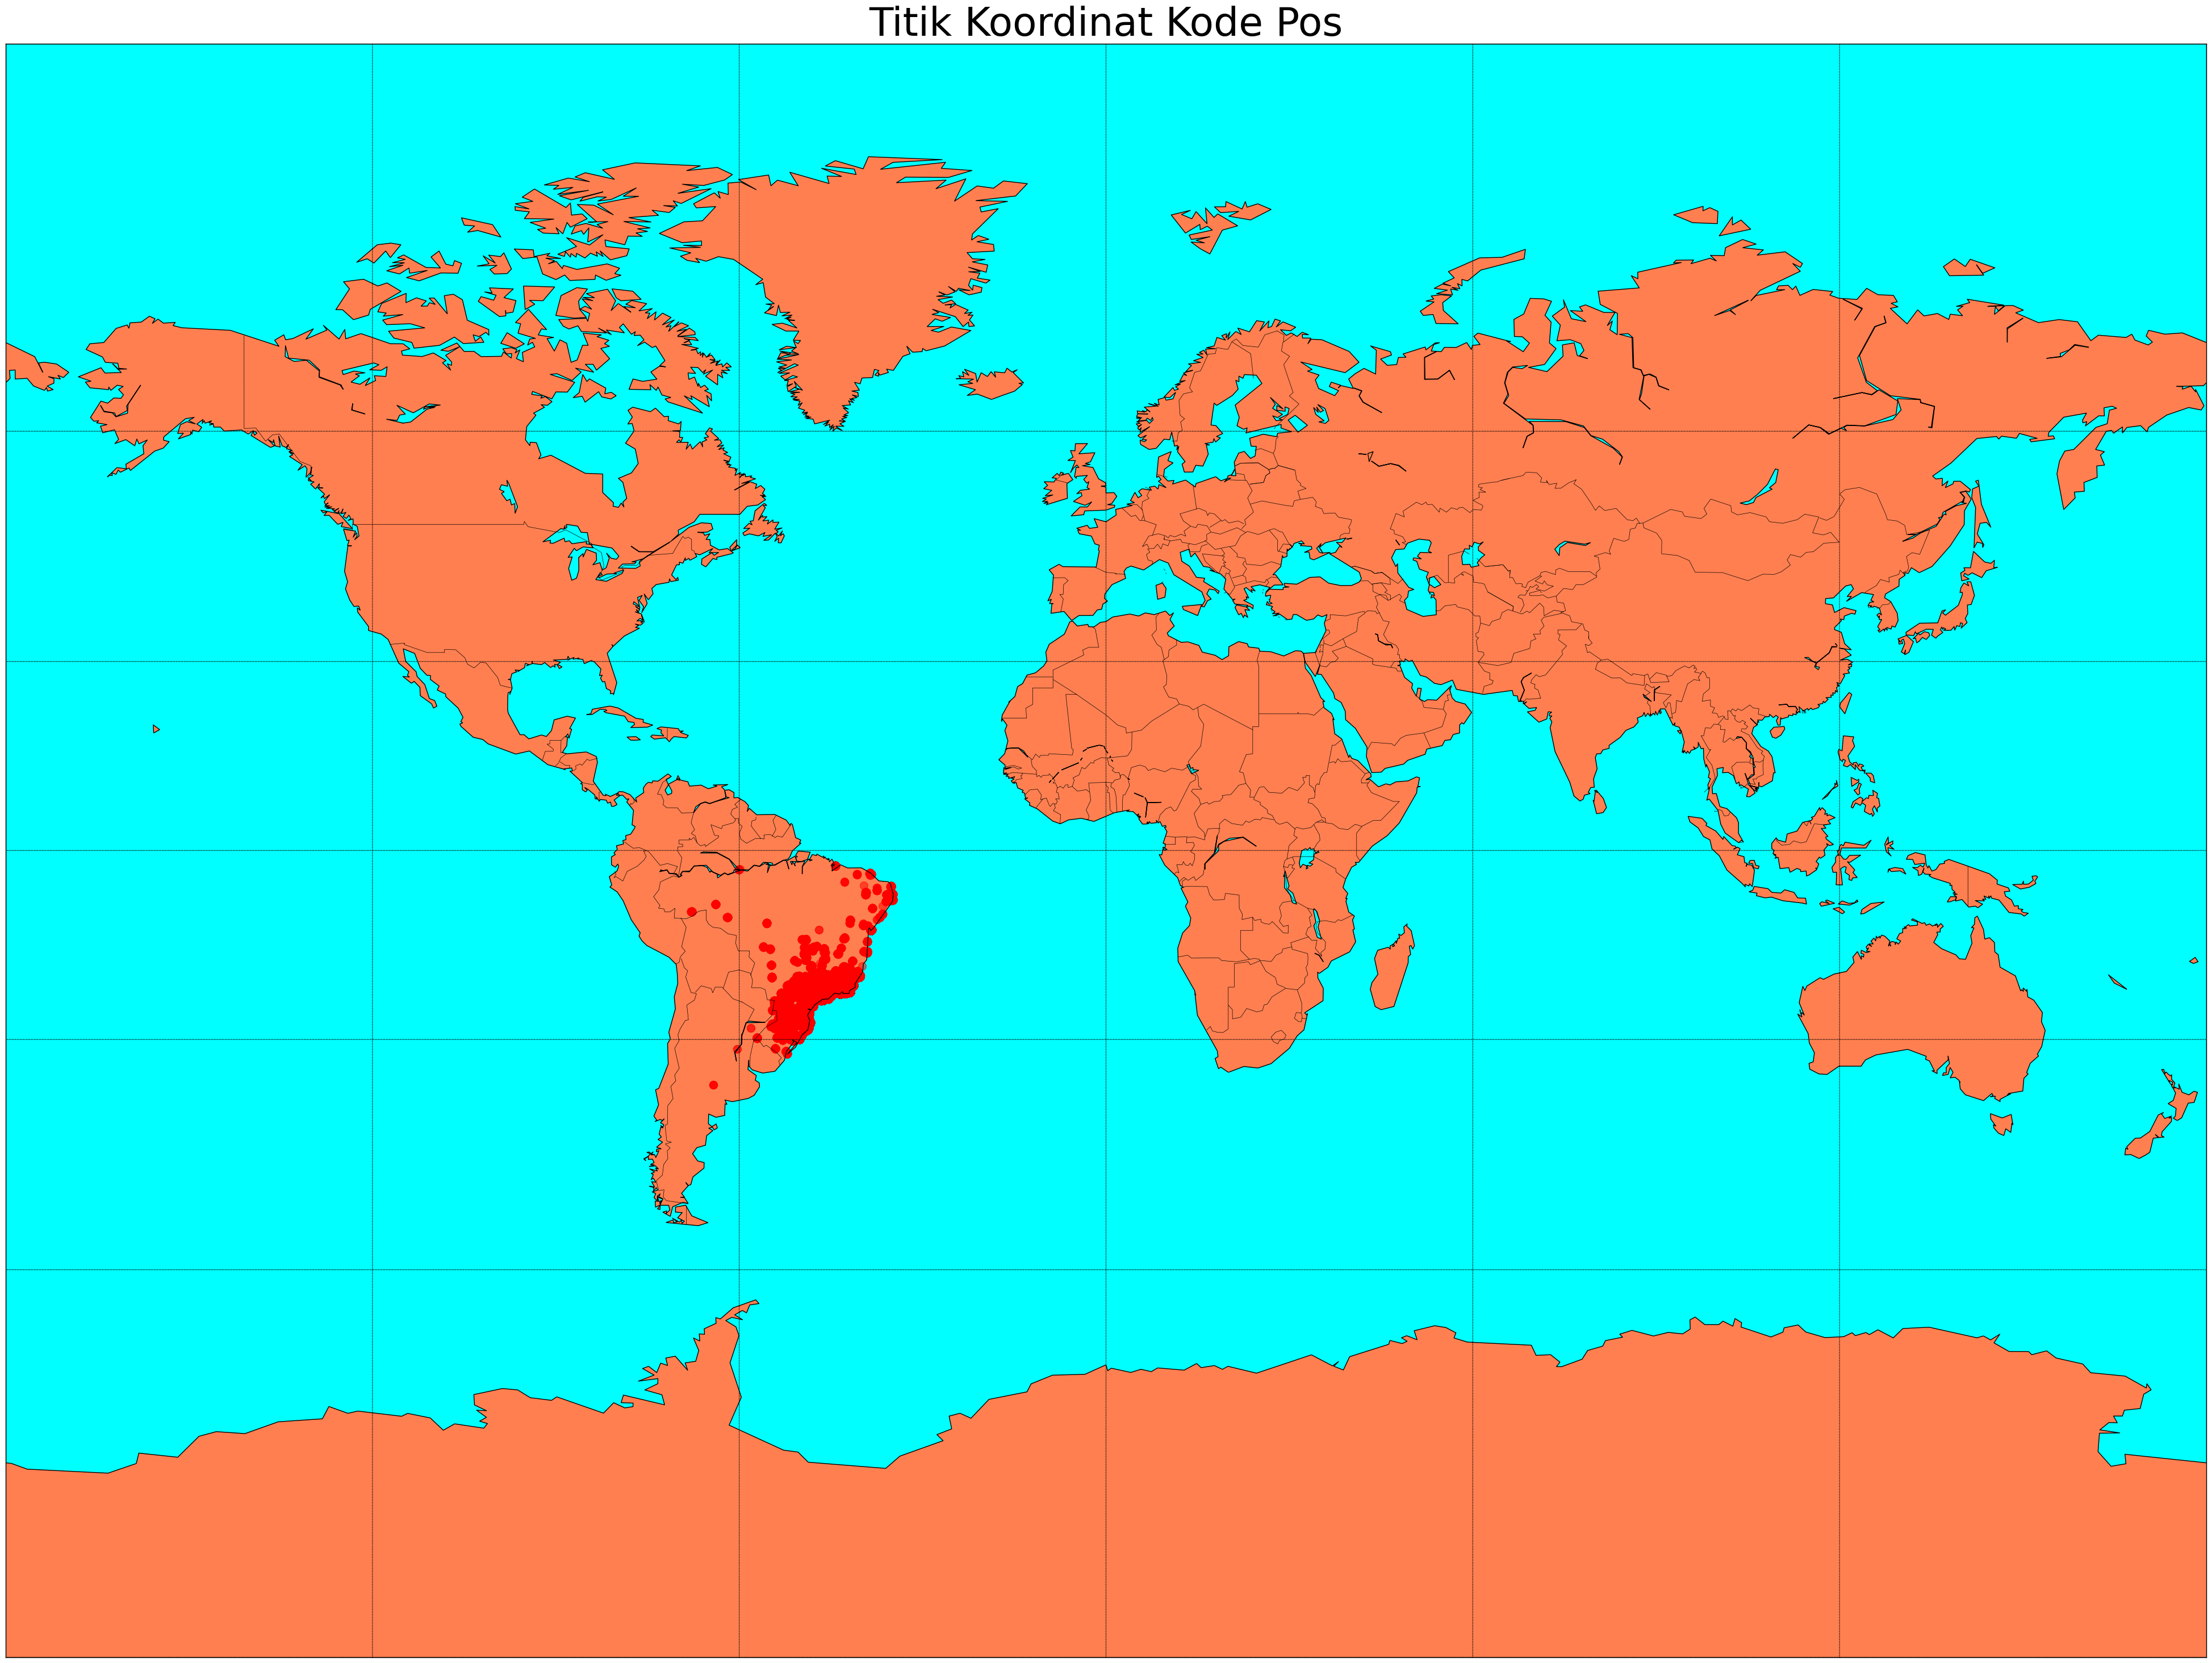

In [102]:
latitude = sellers_geo['geolocation_lat'].tolist()
longitude = sellers_geo['geolocation_lng'].tolist()

# membuat basemap peta dunia
plt.figure(figsize=(50, 50))
m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua') 
m.drawcountries(color='black')

# menambahkan titik koordinat
m.scatter(longitude, latitude, latlon=True, s=100, c='red', marker='o', alpha=0.5)

plt.title("Titik Koordinat Kode Pos", fontsize=50)
plt.show()

In [103]:
sellers_geo.groupby('seller_state').size().sort_values(ascending=False)

seller_state
SP    171859
MG     47783
PR     31750
RJ     19523
SC     18583
RS     13395
GO      1978
BA      1821
ES      1672
DF       803
CE       440
MS       345
PE       308
RN       302
PB       293
PA       267
MT       221
RO       172
AC       111
MA        74
SE        69
AM        16
PI         4
dtype: int64

**Insight**<br>
Kebanyakan penjual masih terdapat di negara Brazil, tetapi ada beberapa diluar negara Brazil, seperti di Argentina

## Visualization & Explanatory Analysis

### Pertanyaan 1: Jam berapa pelanggan sering berbelanja?

In [104]:
orders_dataset_clean['order_purchase_hour'] = orders_dataset_clean['order_purchase_timestamp'].dt.hour

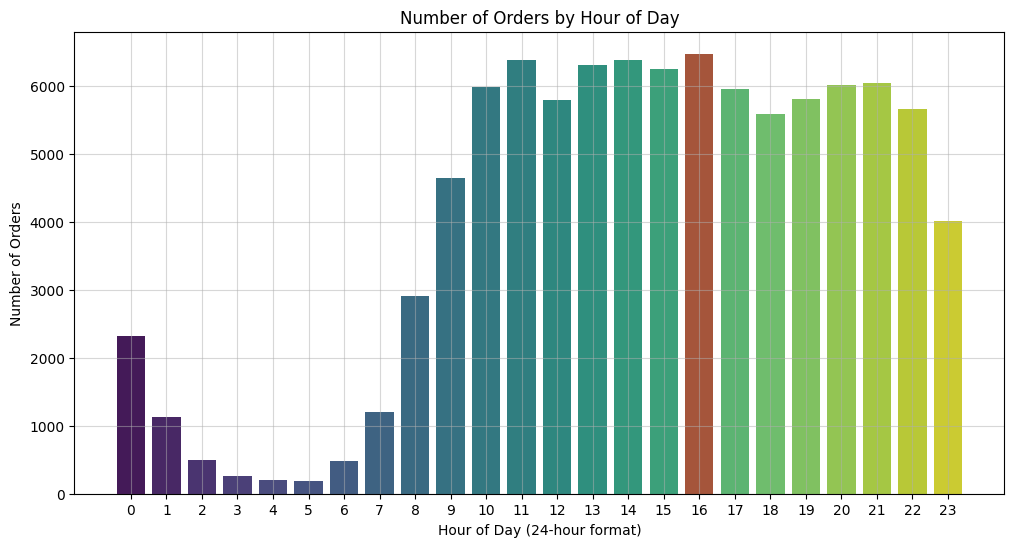

In [105]:
order_hour_pivot = orders_dataset_clean.groupby('order_purchase_hour').size()

plt.figure(figsize=(12, 6))
sns.barplot(x=order_hour_pivot.index, y=order_hour_pivot.values, palette='viridis')

# Highlight the max bar
max_value_idx = order_hour_pivot.argmax()
plt.bar(max_value_idx, order_hour_pivot[max_value_idx], color='red', alpha=0.5)

plt.title('Number of Orders by Hour of Day')
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Number of Orders')
plt.grid(True, alpha=0.5)
plt.show()

In [106]:
order_hour_pivot.to_csv('quest_vis_data/first_quest.csv', index=True, header=["purchase_amount"])

**Insight**<br>
Antara Pukul `10.00` sampai `22.00` (siang sampai malam hari) adalah waktu dimana pelanggan lebih sering melakukan pembelian, dapat dilihat berdasarkan plot di atas. Dengan jumlah pelanggan melakukan pembelian terbanyak adalah di pukul 16.00

### Pertanyaan 2: Wilayah mana yang memiliki peningkatan persentase basis pelanggan tertinggi dalam 6 bulan terakhir

In [107]:
customers_orders_geolocation = customers_dataset.merge(orders_dataset, how='inner', on='customer_id')
customers_orders_geolocation.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

     order_approved_at order_delivered_carrier_date  \
0  2017-05-16 15:22:12          2017-05-23 10:47:57   
1  2018-01-12 20:58:32          2018-01-15 17:14:59   
2  2018-05-20 16:19:10          2018-06-11 14:31:00   
3  2018-03-13 17:29:19          2018-03-27 23:22:42   
4  2018-07-29 10:10:09          2018-07-30 15:16:00   

  order_delivered_customer_date order_estimated_delivery_date  
0           2017-05-25 10:35:35           2017-06-05 00:00:00  
1           2018-01-29 12:41:19           2018-02-06 00:00:00  
2           2018-06-14 17:58:51           2018-06-13 00:00:00  
3           2018-03-28 16:04:25           2018-04-10 00:00:00  
4           2018-08-09 20:55:48           2018-08-15 00:00:00

In [108]:
customers_orders_geolocation = customers_orders_geolocation.drop(columns=[
    'customer_id', 
    'customer_unique_id',
    'customer_zip_code_prefix',
    'order_status', 
    'order_approved_at', 
    'order_delivered_carrier_date', 
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    ], errors='ignore')
customers_orders_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_city             99441 non-null  object
 1   customer_state            99441 non-null  object
 2   order_id                  99441 non-null  object
 3   order_purchase_timestamp  99441 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


In [109]:
customers_orders_geolocation.dropna(inplace=True)
customers_orders_geolocation.drop_duplicates(keep='first', inplace=True)
print(f'Null values:\n{customers_orders_geolocation.isna().sum()}')
print(f'Duplicated values: {customers_orders_geolocation.duplicated().sum()}')
customers_orders_geolocation.info()

Null values:
customer_city               0
customer_state              0
order_id                    0
order_purchase_timestamp    0
dtype: int64
Duplicated values: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_city             99441 non-null  object
 1   customer_state            99441 non-null  object
 2   order_id                  99441 non-null  object
 3   order_purchase_timestamp  99441 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


In [110]:
customers_orders_geolocation['order_purchase_timestamp'] = pd.to_datetime(customers_orders_geolocation['order_purchase_timestamp'])

In [111]:
latest_order = customers_orders_geolocation['order_purchase_timestamp'].max()
six_months_to_latest_order = latest_order - pd.DateOffset(months=6)
time_trimmed_order = customers_orders_geolocation[customers_orders_geolocation['order_purchase_timestamp'] >= six_months_to_latest_order]
print(f'Latest order: {time_trimmed_order["order_purchase_timestamp"].max()}')
print(f'6 months before latest order: {time_trimmed_order["order_purchase_timestamp"].min()}')

Latest order: 2018-10-17 17:30:18
6 months before latest order: 2018-04-17 17:32:13


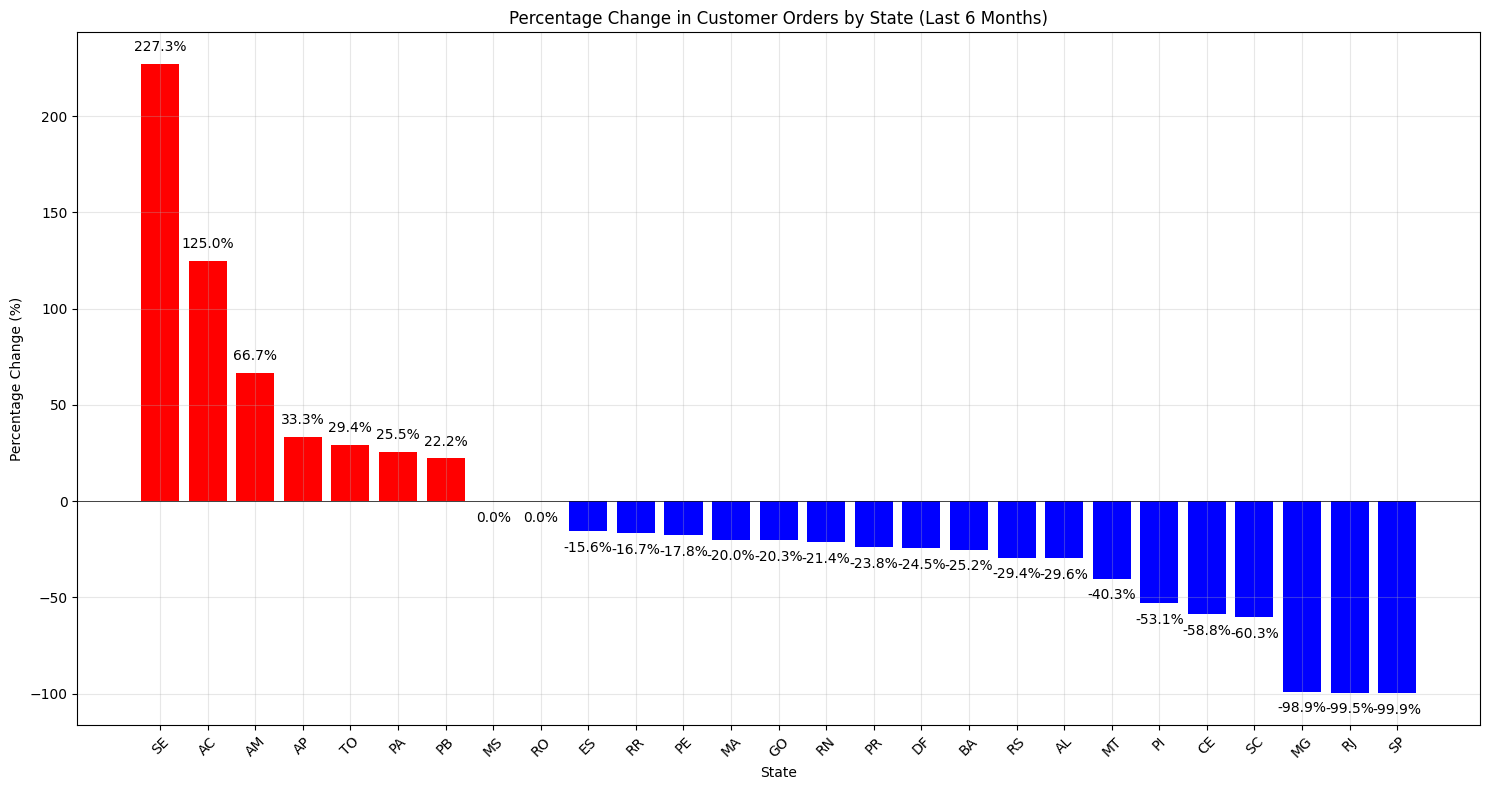

In [112]:
# Group by state and order date, count unique orders
state_time_series = time_trimmed_order.sort_values(by='order_purchase_timestamp', ascending=True).groupby([
    'customer_state', 
    pd.Grouper(key='order_purchase_timestamp', freq='W')
])['order_id'].count().reset_index()

# Calculate orders per state
initial_orders = state_time_series.groupby('customer_state')['order_id'].head(4).groupby(state_time_series['customer_state']).sum()
final_orders = state_time_series.groupby('customer_state')['order_id'].tail(4).groupby(state_time_series['customer_state']).sum()

# Calculate percentage change
percent_change = ((final_orders - initial_orders) / initial_orders * 100).sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(15, 8))
colors = ['red' if x > 0 else 'blue' for x in percent_change]
plt.bar(percent_change.index, percent_change.values, color=colors)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

plt.title('Percentage Change in Customer Orders by State (Last 6 Months)')
plt.xlabel('State')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels on top of each bar
for i, v in enumerate(percent_change):
    plt.text(i, v + (5 if v > 0 else -5), 
             f'{v:.1f}%', 
             ha='center', 
             va='bottom' if v > 0 else 'top')

plt.tight_layout()
plt.show()

In [142]:
state_time_series.to_csv('quest_vis_data/second_quest.csv', index=True)

**Insight:**<br>
wilayah dengan peningkatan pelanggan tertinggi adalah wilayah **SE** dengan presentasi kenaikan sebesar `227.3%`

### Pertanyaan 3: Jenis barang apa yang memiliki penjualan tertinggi dalam 1 kuartal terakhir?

In [113]:
order_products = order_items_dataset.merge(products_dataset, how='inner', on='product_id').merge(orders_dataset, how='inner', on='order_id').merge(product_category_name_translation, how='inner', on='product_category_name')
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111023 entries, 0 to 111022
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       111023 non-null  object 
 1   order_item_id                  111023 non-null  int64  
 2   product_id                     111023 non-null  object 
 3   seller_id                      111023 non-null  object 
 4   shipping_limit_date            111023 non-null  object 
 5   price                          111023 non-null  float64
 6   freight_value                  111023 non-null  float64
 7   product_category_name          111023 non-null  object 
 8   product_name_lenght            111023 non-null  float64
 9   product_description_lenght     111023 non-null  float64
 10  product_photos_qty             111023 non-null  float64
 11  product_weight_g               111022 non-null  float64
 12  product_length_cm             

In [114]:
order_products = order_products.drop(columns=[
    'order_item_id',
    'product_id',
    'seller_id',
    'shipping_limit_date',
    'price',
    'freight_value',
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm',
    'customer_id',
    'order_status',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'product_category_name',
])
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111023 entries, 0 to 111022
Data columns (total 3 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   order_id                       111023 non-null  object
 1   order_purchase_timestamp       111023 non-null  object
 2   product_category_name_english  111023 non-null  object
dtypes: object(3)
memory usage: 2.5+ MB


In [115]:
order_products.dropna(inplace=True)
order_products.drop_duplicates(keep='first', inplace=True)
print(f'Null values:\n{order_products.isna().sum()}')
print(f'Duplicated values: {order_products.duplicated().sum()}')
order_products.info()

Null values:
order_id                         0
order_purchase_timestamp         0
product_category_name_english    0
dtype: int64
Duplicated values: 0
<class 'pandas.core.frame.DataFrame'>
Index: 97997 entries, 0 to 111022
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       97997 non-null  object
 1   order_purchase_timestamp       97997 non-null  object
 2   product_category_name_english  97997 non-null  object
dtypes: object(3)
memory usage: 3.0+ MB


In [116]:
order_products['order_purchase_timestamp'] = pd.to_datetime(order_products['order_purchase_timestamp'])

In [117]:
last_quartal_date = latest_order - pd.DateOffset(months=3)
last_quartal_orders = order_products[order_products['order_purchase_timestamp'] >= last_quartal_date]
print(f'Last quartal date: {last_quartal_date}')
print(f'Latest order: {last_quartal_orders["order_purchase_timestamp"].max()}')
last_quartal_orders.shape

Last quartal date: 2018-07-17 17:30:18
Latest order: 2018-09-03 09:06:57


(10042, 3)

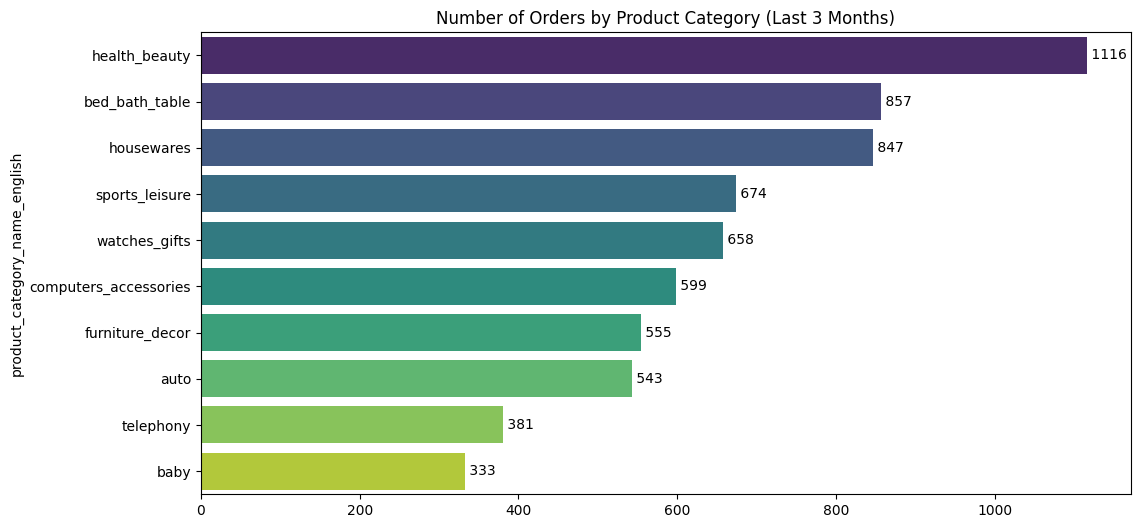

In [118]:
last_quartal_orders_grouped = last_quartal_orders.groupby('product_category_name_english').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=last_quartal_orders_grouped.values, y=last_quartal_orders_grouped.index, palette='viridis')

# Add value labels on the bars
for i, v in enumerate(last_quartal_orders_grouped.values):
    plt.text(v, i, f' {v}', va='center')
plt.title('Number of Orders by Product Category (Last 3 Months)')
plt.show()


**Insight**<br>
Jenis barang dengan penjualan tertinggi dalam satu quartal terakhir adalah barang kategori **health beauty** dengan penjualan mencapai `1,116` buah

### Pertanyaan 4: Metode pembayaran mana yang paling populer berdasarkan jumlah total pembayaran?

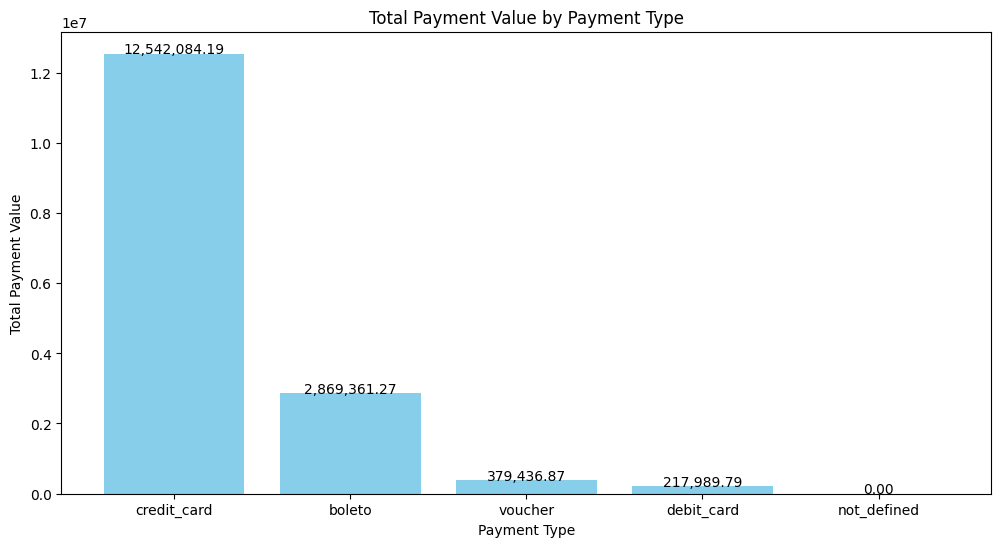

In [120]:
# Sort the data (use ascending=False to have largest value at the top)
order_payments_dataset_clean_group = order_payments_dataset_clean.groupby('payment_type').sum().sort_values(by='payment_value', ascending=False).reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(order_payments_dataset_clean_group['payment_type'], order_payments_dataset_clean_group['payment_value'], color='skyblue')

# Add value labels on the bars
for i, v in enumerate(order_payments_dataset_clean_group['payment_value']):
    plt.text(i, v, f'{v:,.2f}', ha='center')
plt.title('Total Payment Value by Payment Type')
plt.ylabel('Total Payment Value')
plt.xlabel('Payment Type')
plt.show()

**Insight**<br>
jenis pembayaran yang paling populer adalah jenis pembayaran *credit_card* dengan total pembayaran lebih dari `12,524,000`

### Pertanyaan 5: Jenis barang apa saja yang mengalami kenaikan persentase penjualan terbanyak dibandingkan dengan tahun sebelumnya?

In [121]:
order_products_year = order_products.copy()
order_products_year['order_purchase_year'] = order_products_year['order_purchase_timestamp'].dt.year

latest_year = order_products_year['order_purchase_year'].max()
order_products_year = order_products_year[(order_products_year['order_purchase_year'] == latest_year) | (order_products_year['order_purchase_year'] == latest_year - 1)]
order_products_year.head()

order_id order_purchase_timestamp  \
0  00010242fe8c5a6d1ba2dd792cb16214      2017-09-13 08:59:02   
1  00018f77f2f0320c557190d7a144bdd3      2017-04-26 10:53:06   
2  000229ec398224ef6ca0657da4fc703e      2018-01-14 14:33:31   
3  00024acbcdf0a6daa1e931b038114c75      2018-08-08 10:00:35   
4  00042b26cf59d7ce69dfabb4e55b4fd9      2017-02-04 13:57:51   

  product_category_name_english  order_purchase_year  
0                    cool_stuff                 2017  
1                      pet_shop                 2017  
2               furniture_decor                 2018  
3                     perfumery                 2018  
4                  garden_tools                 2017

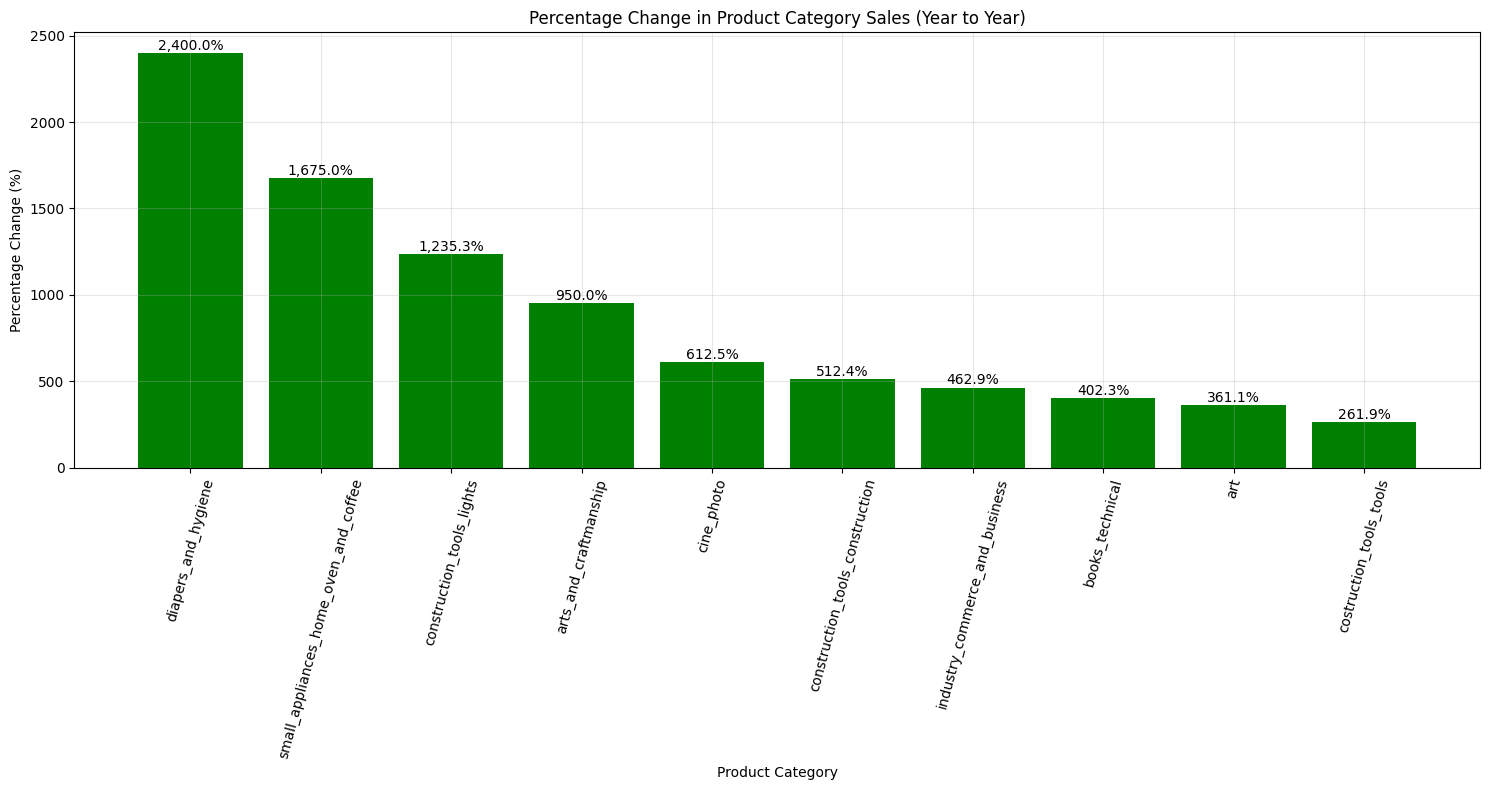

In [150]:
order_products_year_grouped = order_products_year.groupby(['product_category_name_english', 'order_purchase_year']).size().unstack()

# Calculate percentage change
percent_change = ((order_products_year_grouped[latest_year] - order_products_year_grouped[latest_year-1]) / order_products_year_grouped[latest_year-1] * 100).sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(15, 8))
colors = ['red' if x < 0 else 'green' for x in percent_change]
plt.bar(percent_change.index, percent_change.values, color=colors)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

plt.title('Percentage Change in Product Category Sales (Year to Year)')
plt.xlabel('Product Category')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=75)
plt.grid(True, alpha=0.3)

# Add value labels
for i, v in enumerate(percent_change):
    plt.text(i, v + (1 if v > 0 else -1), 
            f'{v:,.1f}%', 
            ha='center', 
            va='bottom' if v > 0 else 'top',)

plt.tight_layout()
plt.show()

**Insight**<br>
Produk yang memiliki presentase kenaikan penjualan tertinggi dari tahun `2017` ke `2018` adalah *diapers_and_hygiene* yang mencapai kenaikan `2,400%`

### Pertanyaan 6: Berapa rata-rata total harga per transaksi per bulan?

In [123]:
order_items_time = order_items_dataset.merge(orders_dataset, how='inner', on='order_id')
order_items_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   customer_id                    112650 non-null  object 
 8   order_status                   112650 non-null  object 
 9   order_purchase_timestamp       112650 non-null  object 
 10  order_approved_at              112635 non-null  object 
 11  order_delivered_carrier_date   111456 non-null  object 
 12  order_delivered_customer_date 

In [124]:
order_items_time.drop(columns=[
    'order_item_id',
    'product_id',
    'seller_id',
    'shipping_limit_date',
    'freight_value',
    'customer_id',
    'order_status',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
], inplace=True)

order_items_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  112650 non-null  object 
 1   price                     112650 non-null  float64
 2   order_purchase_timestamp  112650 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.6+ MB


In [125]:
order_items_time['order_purchase_timestamp'] = pd.to_datetime(order_items_time['order_purchase_timestamp'])

In [126]:
order_items_time.dropna(inplace=True)
order_items_time.isna().sum()

order_id                    0
price                       0
order_purchase_timestamp    0
dtype: int64

In [127]:
order_items_time['purchase_year_month'] = order_items_time['order_purchase_timestamp'].dt.to_period('M')
order_items_time

order_id   price order_purchase_timestamp  \
0       00010242fe8c5a6d1ba2dd792cb16214   58.90      2017-09-13 08:59:02   
1       00018f77f2f0320c557190d7a144bdd3  239.90      2017-04-26 10:53:06   
2       000229ec398224ef6ca0657da4fc703e  199.00      2018-01-14 14:33:31   
3       00024acbcdf0a6daa1e931b038114c75   12.99      2018-08-08 10:00:35   
4       00042b26cf59d7ce69dfabb4e55b4fd9  199.90      2017-02-04 13:57:51   
...                                  ...     ...                      ...   
112645  fffc94f6ce00a00581880bf54a75a037  299.99      2018-04-23 13:57:06   
112646  fffcd46ef2263f404302a634eb57f7eb  350.00      2018-07-14 10:26:46   
112647  fffce4705a9662cd70adb13d4a31832d   99.90      2017-10-23 17:07:56   
112648  fffe18544ffabc95dfada21779c9644f   55.99      2017-08-14 23:02:59   
112649  fffe41c64501cc87c801fd61db3f6244   43.00      2018-06-09 17:00:18   

       purchase_year_month  
0                  2017-09  
1                  2017-04  
2                  2018-01  
3                  2018-08  
4                  2017-02  
...                    ...  
112645             2018-04  
112646             2018-07  
112647             2017-10  
112648             2017-08  
112649             2018-06  

[112650 rows x 4 columns]

In [128]:
order_items_time_grouped = order_items_time.groupby(['order_id', 'purchase_year_month']).agg({'price': 'sum'}).reset_index().sort_values(by='purchase_year_month', ascending=True)
order_items_time_grouped

order_id purchase_year_month   price
17782  2e7a8482f6fb09756ca50c10d7bfc047             2016-09   72.89
88784  e5fa5a7210941f7d56d0208e4e071d35             2016-09   59.50
73845  bfbd0f9bdef84302105ad712db648a6c             2016-09  134.97
69842  b582532527260a8be949eac9f4d0ccff             2016-10   49.90
80165  cfdc6f2061897ed3b3f1a9ac3437c6f9             2016-10  119.80
...                                 ...                 ...     ...
40480  691c30273e86d88ab9be2ac45e25d516             2018-08  735.00
40483  69219bd2a51085b84942501a7db3aecd             2018-08   59.80
40463  6912f9577b4156d72ee607f78328ed11             2018-08   35.90
55778  917fa92d0e4a7a2297aa28d79a35b64d             2018-08  119.99
32424  54282e97f61c23b78330c15b154c867d             2018-09  145.00

[98666 rows x 3 columns]

In [129]:
order_items_time_grouped = order_items_time_grouped.groupby('purchase_year_month').agg({'price': 'mean'}).reset_index()
order_items_time_grouped

purchase_year_month       price
0              2016-09   89.120000
1              2016-10  160.739156
2              2016-12   10.900000
3              2017-01  152.487795
4              2017-02  142.702262
5              2017-03  141.743393
6              2017-04  150.534182
7              2017-05  138.270803
8              2017-06  134.609450
9              2017-07  125.480343
10             2017-08  133.699436
11             2017-09  147.160427
12             2017-10  145.407056
13             2017-11  135.588695
14             2017-12  132.274924
15             2018-01  131.583152
16             2018-02  126.109756
17             2018-03  136.785398
18             2018-04  143.733451
19             2018-05  145.413349
20             2018-06  140.442258
21             2018-07  142.755814
22             2018-08  132.468433
23             2018-09  145.000000

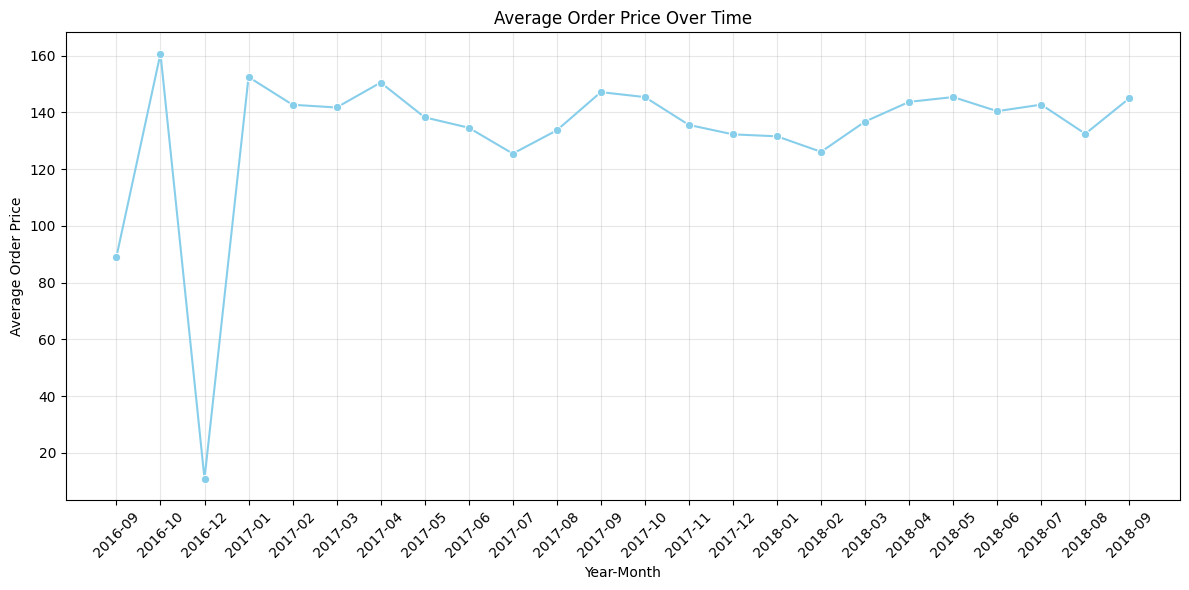

In [130]:
# Convert period to string for plotting
order_items_time_grouped['period_str'] = order_items_time_grouped['purchase_year_month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(x='period_str', y='price', data=order_items_time_grouped, marker='o', color='skyblue')
plt.title('Average Order Price Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Order Price')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Insight**<br>
Rata-rata penjualan per transaksi di setiap bulannya adalah di atas `120` walaupun terdapat anomali di bulan Desember 2016 yang mengalami penurunan tajam dengan rata-rata di bawah `20`

### Pertanyaan 7: Apakah terdapat korelasi antara jumlah foto produk dengan jumlah penjualan produk?

In [131]:
orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [132]:
order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [133]:
products_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [134]:
order_items_product = order_items_dataset.merge(products_dataset, how='inner', on='product_id')
order_items_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    112650 non-null  object 
 1   order_item_id               112650 non-null  int64  
 2   product_id                  112650 non-null  object 
 3   seller_id                   112650 non-null  object 
 4   shipping_limit_date         112650 non-null  object 
 5   price                       112650 non-null  float64
 6   freight_value               112650 non-null  float64
 7   product_category_name       111047 non-null  object 
 8   product_name_lenght         111047 non-null  float64
 9   product_description_lenght  111047 non-null  float64
 10  product_photos_qty          111047 non-null  float64
 11  product_weight_g            112632 non-null  float64
 12  product_length_cm           112632 non-null  float64
 13  product_height

In [135]:
order_items_product.drop(columns=[
    'order_item_id',
    'seller_id',
    'shipping_limit_date',
    'price',
    'freight_value',
    'product_name_lenght',
    'product_category_name',
    'product_description_lenght',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm',
], inplace=True)

order_items_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   order_id            112650 non-null  object 
 1   product_id          112650 non-null  object 
 2   product_photos_qty  111047 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.6+ MB


In [136]:
order_items_product.dropna(inplace=True)
order_items_product.isna().sum()

order_id              0
product_id            0
product_photos_qty    0
dtype: int64

In [137]:
order_items_product_grouped = order_items_product.groupby('product_photos_qty').size().sort_values(ascending=False).reset_index(name='sales_count')
order_items_product_grouped

product_photos_qty  sales_count
0                  1.0        56028
1                  2.0        21963
2                  3.0        12392
3                  4.0         8437
4                  5.0         5368
5                  6.0         3786
6                  7.0         1501
7                  8.0          727
8                 10.0          342
9                  9.0          313
10                11.0           71
11                12.0           53
12                13.0           30
13                15.0           12
14                17.0           11
15                14.0            6
16                18.0            4
17                19.0            2
18                20.0            1

In [138]:
order_items_product_grouped.corr()

product_photos_qty  sales_count
product_photos_qty            1.000000    -0.619991
sales_count                  -0.619991     1.000000

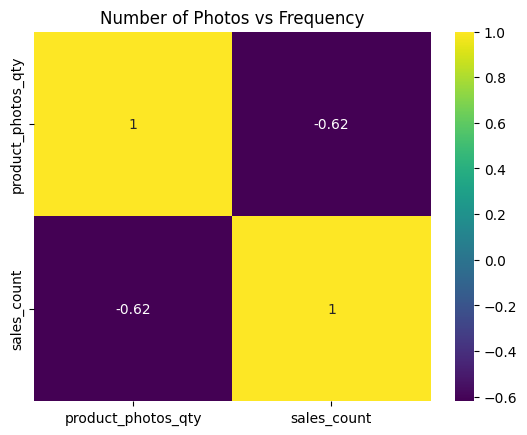

In [ ]:
sns.heatmap(order_items_product_grouped.corr(), annot=True, cmap='viridis')
plt.title('Number of Photos vs Frequency')
plt.show()

**Insight**<br>
Terdapat korelasi bernilai negatif yang cukup besar antara jumlah penjualan dengan jumlah foto, yaitu `-0.62`. Hal ini menunjukkan, semakin sedikit jumlah foto dari suatu produk, produk tersebut lebih sering terjual. Tetapi *insight* ini hanya diambil berdasarkan jumlah foto dengan jumlah penjualan, ada kemungkinan adanya faktor lain yang mempengaruhi penjualan.

## Kesimpulan

- Kesimpulan pertanyaan 1: lebih banyak pelanggan yang melakukan **transaksi** di pukul **`10.00` sampai `22.00`** atau **siang sampai malam(sebelum tengah malam/dini hari)** hari.
- Kesimpulan pertanyaan 2: Wilayah **SE** menjadi wilayah dengan kenaikan presentase pelanggan dalam **`6`** bulan terakhir
- Kesimpulan pertanyaan 3: ***Health & Beauty*** menjadi jenis barang yang paling banyak terjual dalam quartal terakhir, dengan penjualan mencapai **`1,116`** buah
- Kesimpulan pertanyaan 4: Metode pembayaran ***credit card*** adalah jenis pembayaran yang paling sering digunakan dengan total transaksi mencapai **`12,524,000`**
- Kesimpulan pertanyaan 5: ***Diapers & Hygiene*** adalah jenis produk dengan presentasi kenaikan tertinggi dari tahun `2017` ke tahun `2018` dengan kenaikan mencapai **`2,400%`**
- Kesimpulan pertanyaan 6: **Rata-rata** penjualan per **transaksi** setiap bulannya berada di atas angka **`120**
- Kesimpulan pertanyaan 7: Korelasi antara **jumlah foto produk** dengan **jumlah penjualan** adalah **korelasi negatif** sebesar **`-0.62`** yang berarti semakin sedikit foto semakin banyak penjualan